In [ ]:
%%capture
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
import numpy as np
import imageio

%pylab inline

In [ ]:
# Utils
def image_size(image):
    if image.ndim == 2:
        return image.shape
    else:
        return image.shape[:-1]

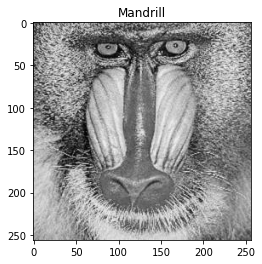

In [ ]:
import base64
import io

mandrill_str = b'iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAAAAAB5Gfe6AAAAB3RJTUUH5AYEAykUHflkDAAAIABJREFUeJwEwWeQXImBGOaXQ7/u917nnKanJ+fBDGYGGbvABmwAyb0jj7w7XuCpbFmWy5LLLumXXGWXqlSyLPuky2fqmJbkcpfcCOwugEXGYDCYnKdzzt2v08vv+fvAf//59z4xuqfu/w9fHIBh18u3vxktDf32Bx9Zl+4vu0TTw5vY85H0bevCxlsfPrkyNffF33lvdIfi6T/qH4ep5vo74LE3O6fcS//zOF2Sb3nbGTJkWmh8SVxR696l8k+r/+ynb8CPf9+bqTqBWzd/tT31QyEd+c/FH3W80f+TBVz11zsPpn9HLw7d/e7/Bf5P6sNq752AsM/wBsO//Z9zx9fT13Nswnz8ai8vEVi6UzXj9hbcHP3MMf/jf5NBi8vFagO6+85rGywDPb2K/uUFZfFzOPhooBJoPw2DN7nK5DcrrRBe5/7fs/99DLxH+84/9B6z/m+GivBrOfXrnG48sx9ww04eP5rY304Spv247c829fN6R6yEXyEPZh9l9obtq8UT0tc7HmEPL88DRebsS/PCMlV+IsxB80hx74oo+G9bf2mZj3UUaex0PCNU6ivIfqvrMG6VKubQGdeRSbGFswfcMxbdLQStJ76NdozbDBhPU9wra7OqscvvGxH3ZjArmDzl8Tnm6c5BLOza7Qd02QHcObHYQRUs/VJ2hfQaS6SSbfqR2zmQb9aCAkU/vYId7V8e67sT6dEckrhY0zeG+OX6+jBtGZgdb+c7IszY9snY2QvySXNCHu7A9ZMgDva+CneQB+tAf/bYIXwNL15+SR9e932Cn/2kL80H/uqa1r/ec8woKv+8Ss6Rjdy5D5Rr6pv3h5OW2slozn7DLeRHLnA2rM0//mO+4FPb/eOrQrwcev9p4vsso/1+sFvwX915dbt/NNUP1X1f46fFSDshglb/C67KrT7L6Od49+HJKy41ZpLYQU73lL3lUWq5Rm6RKAxjqYzO1L18N9nBDknbzhb98uueu1VtZEvFeVdjuHEUkZ9MtPPc0LBNHWqTK+Ca8B/9k+VM8Ndjnc9e9aHpt3DXvOz7BdaImj4/L6kHwW+yePmoZDNuYqzN8nHPpgzeK4lTNxBeTRRpmBgX9xQnbo/Lxh47jz7LjuQgSuo4Id5fmmEC5G7H9/I45HzUv+7da1w4CzXWO7dmYMLq+F2wNPSpxSWEixL7RGNRSj2kJlx93Ms8NbzRAJXoH8jYNiWdcBKc51ASPgjzLlbbwDzAQLS2Db3h+Kv6+l7P+Jth+xPCz55ks3xKrkpBNL0oVZOAfcs4EYAxVwKI5yLfzRw3tstYbYw84OuVV45z/hG9PkKSD13uYec/cD+3nWd3Im7K8MHyNVQd7MGqYN1LzUZjtI1ptmfydNfaPc8Rdwgs03p4kQFyptd9UyOfKvPQXc8PYaO0nLF8Cx9vDgx5z/e2Aa232INalvcXtIkg+5+JSAkyd5xQ3wXIkjZR7YQGis9xo/Xg3oxVYQlr1urFPZWSeYd2BW1VGGvuFhdHoNqD6JF3ikvdHmg9vUkcH+3CsVxoovpB/Y28N/QW0ljK6dWd7Es0wrhl5Fvoi7L56GEuXOAtYL0hbS+6tP26WQ2RpkbsMNXqXlwEEd+2JL9DPM8ZKdu4pboCGGU1oFbJKi08yVzpLTqeSGfM3ONz3+8ehZ/9zIBhd+8YzleDvjhFWjOhQq4/EbxDM/56cZQKncaCVhsHqoe8mqJBN4xAZQu24l+VcH0pVInO8badh1GlMKf3kOrEn7gzuYbxu9zONWC+s9FImv/6QPio8D3x162pMQ0evM3KcUOB3+69lYFA0Y0b9yTMAKSjn+zVxQeqESOb3aMz5iK2sngnmU03yet47FLCVG9PHKAn6NR1bpu0LWwUNlxQPhG5Mnhb8/dylUSvUE6m0ALbfuo2uAqR7+jt1qdVZPTE80oAwQCjM4AMavtWk07ZjbG0XX/xqn8k1bo9XneGPXt7sdj21g81Pfvo3I1/9Fn+N/Kc+diguILvfGkbVQZqA6OO08zFkJsQbF8Vw/Qd0tI4gMn5VP9P74Adqnit3+Ewm33CMmBq5Ux01yG22E8L/p7bP3a+Th2abgcaQyvMge3P7ga/eOcF7RT2j7Z62HE9kbdOwHYzwYmOScPxnP6kc/x6GR2g7vjGfZza/7rd3uiYzoSNam9CVe430i9VcjWBw5yAwheOvgZKwHecGXhutP0AtuZUwvCHWP3U9coQCrWgQvfUmoPkivMGKo8NbT8EPfAAtF4NAP7BQqBuyt3XfUN4L7tvFBjmG6e4D029CEiXKN0lBY2VG/kUfr77C3fx9sLw+jhoP5HpQCVDMI1fHXUf6Vj8GbEykvNX4JBHqdHLu4/zS4N7k1+GKz9mZuP5xGh52JGEKKj1XDb4IrmmbLIWxtIe4/jxdUyn7c8hJanXidl5x1OD9/rIlHpXl4neeBbj3K7e3czw80ZRmmf26Y+lTjGuaO5i6U1LdNvMlXIxwtrwOYvP3KNcR1d7ULxjgboZw0WvmeiVe71xl+9yV1IW/EEawJOQw+mcOHFAIXPvFCdyJXXKJiTFYdRulurhvO2rbzFtU2G93Jcn/UMj0kfK9Xv6gfO1reH7nrtokyRCkLOwKq7wwUa7JkH2mAMX07mx7qlhyIpeQie3LrtIEYEv3RCpz4+6oKE/6v9tCF8LQqaK43BrISi3xCNqHNVvW53hD1P9oktuTo7BDbx20Jgg51IeO5zMOiYHWVsnQ5soGySdmnfvdXJfAPzc8GMOrG2tNOKHiSUbU6YHyq5k1NaolKzDw6W66o+VdTNMjaaTKQnR2bZw2Ap+nd8Yhy+YGetUTY8HeZ8z5XtMjTd8NdCJgmXBxNcsr4RH5g4ci27XDplyIoXJmMHoqA9h4/b5fO1gU9zTxtmfxL5/NudLMmbhR2z7M8+rfHPZXAiM8o9f7IzRtoNRxD7/meuCwxfsacdfWW3Pdr0sPPDcWBhcDO9+f/MFXrVsjtipAfsCoPmqsHmUlaXR/RAX4AdP92ujDnsvYIWazZZ1c4U8y02Wy/tDTcxvOrDKlCX2Ic5L5tbw7yXTFUMtGFkBbWPBw5qbitO6/Oq12bnHh/X88pbH943sRC8iKw3TPlegFRYxexWk5zdSraEGOuIblM0mW153DyTLqUX8/FeeUOv4oOey2ZeWWnkGM7FGrG5T7XZjuVVg7Y0mAu3jh3gOfqlHLCntcWl2pQl/+OzNk8XU++5r5heCI6RaEdPXL7w3E81QC22X2HEx/ejOeveWe3BWA8fHhuE/P64a2+/8yiuaD+aX/9vbMz+dSKWRtOWYplqpYq08FB/0rDlt7mPm8LDhY+/8R9eBe2UTvfXkz5H6N00bX+Pvnl0HNrOHDTfuO16An72e1+jfcynrzrO/uo2/6+t4iN8vdR33pPFsnNyTZ22MYMqvqI7YUk0eP3OOhhEHFQqdJ4JhXytsJwQ4cIxPLBkzvzLUE9LP5RemBWrswnnghCFcWJDitezjOp451bqJVoHKHHQt7VYi8jx0/Nr4g/KVyxvhq61HRNNDx7fBpat8XAgZVtXsZlCDwVbzqSUr45ztnpAUmjUmQOEnidzLDAdrrZMlw97k494F31RwwdA8s22grJbENjYYUNBAVwGO5gYyNVJfEFesqPaXZChJsg9f/ou1Wl6XX48cFfQL/ylrwU5X3NPu6vetzeRH31MC8ex6tXlUGk4f9aDXoPoon4vukO92h6HReiiruQUwD741y1QHixeAUMQEstZQyOcsWS2CTXXjSdDUOWSvzOKtXfmPR8Eh3gk0StywSD14juo8ipyjlRoiN6afSpNvdbIN+JCZkgfheyn6XUC0Gs0poUimzh4FHcCv7iAA5JO1JqtgS1OWmMsdpXfvTsxRQdtll0FxQq9PNbxG+PqVY9ndyAjAbLjK0zv3g293ckMMCfFGunXcq3UmRugHDix2Xr/8j7PIkcdxypzbsYgvL+R+3Zo/uTJIOMdqbt0G1rwXkDQcYunEG/2jttXvimaoAWOlCM+Agmfz+aDlxDI0YqpbDVhEcg9kVLOmKOFDpmyGqOmocGCr2otRveMNlB5jZDEVa6qtrdPj5RtT8fXDkE/gNZan7Hrj0deFPLHp8NKMj2jCq8l+CMl3Re8HrpOsiQ2Kd9re08q3lrmvS380HP4/tv2vqZ+6kYE5K9iMYLx5xp3Njp1z7HpHUXMw+r7ut9W5+n14qfTdj8b/NZiwrjtOwC8zNxL/dSr4Zd9iGZGxIISavMLJCOkOS7fbyKygPvn6NPDHDf8jKnhLpFrG1+R/zBbSJnjrtTEiTT13/De3gCkfhZ3/zth+wX7rB22zqSiYToWsdaE6O/cI9x8nrmjpFXIkuHYFMKzFyzzpnQglqgImDOScJdKOVL1PnPL6046WeLq+vzWiu+PVyilfXd+rdD/5SfKgPR6W9zqn/trXj8tHD51Q7MSs1m2LW4IYnOXee39jrW/x3zj8IsY6nX/9X/PaGbH+p917/aBxUCt9jHXyrI32l9qpSZV8lEdnU81P7rM9Ab6R+WRioZK8eGbxp5eYTxjvgV73ORj60/1Mzao0CwlL5XAwXdkHpTT37LBoDU0dPX4HF6vnw4PTozM7G6l8KB/7Xx4Tq0DhgJ39ujL09U7Fe7r3fHyIMx7dKruYZ7bDrlbqwS5yV3To8rBPk5w0F7wtPSwBA2GLdK8atfZKRGQvCZmkY6nQzhQk3Ib1krLXgeZSDYpRspmGIuDqYKtMUBVAcLsOSkUdl+guEzbGt7tynxze+QoUY4GmhTU0f0O/PkRvCK9v/7vXxPT7jWSHqskmc8DPpvpKs/CkNAad+h39RHO/hRhZWIDN+TFm8f7Q0x1zJXnBet4Osg+ha0g90h3NPX1YIlF8PnCnuTpYeIMtXL5/3nZlO8v9dh+T3ccC5v2HbcAwVmsEVhN5nGRZptqJPIou7ZZRuKutZreOeNlwrsfVBCiMsB9hxRO2Z3FnvnSHa1a0pHQlVBun4WK+38PoivWJNphOciftk5Io8SHjMeebA1SoXPEu4RnBYAKgQrWGFapq58jRPJ6kgBmwViX288u9KielX0UKxAEq0WTrhvPW7k6j4XtzmD2+m5YGa6R5mOiRor1NtM0RY/UwjGemT5poxLtS7KeSV3ywl361VxogXl6JF/SzzJ5zCPAtbp5Rmsu2CWax/WZAtRuH6tCj6I66eGQvnax6l/az/v6fnBRjZ76cXJbnUiU9sGWYz2cSZQlZ3czBhgBAlj2edH0CThoYMtPXUMK0+qiblpbP8quZlcv7HFHb/pf1xfPp7HHykTllma/S59coEk+BgiWtElUU4zahCdQ8PRIgMqKSaFotBhSw5vwMjSKhtquliilrttO0MWVflk8xJ916bO7c+HtmSm6ePgqZQgbLsT4Q6FUQ3Vr8c7s4hJBpV8kw0tk+NbRnR9TD5sFpym7xNKoufxA+++59IVa0wsP4Ej3rQO8IIx83Zu2tT+AIiVh7wv2BENXAXmX99l9T4hf7unlJaizfKHM7qOR93uqllQ1CbxPgNtsXRV1OirzWb3bUbC1p6es03GrmSx6abRUEI0tq1a7HnC3b+629vRO8PFXVij64HRw/jdVTdzvmLt8cYHsvIYOR5fk+Mib1KydZ1drrlQm622xNuFFcgSBnHSAF30Cz2Rd1hWy0CcXbla0WW6NSK1QCo2EJ+5PrtlPuSFyzLw2yLofmspYMgmLOiQ1ZnHF5K9ux98s8cDNaLrQE1SV8BtuPBwefCcL3PADNbrJ47eO+1PRoBftsvPO8O/alLDOe9pYW297pkWqRvuH6ZfH63LPnzvjIkSnXwLTyW5Kj3vRXOlFAUjTNaRM6LUWqK20Flg1qUeAJZw/ptlgab7Eu0Eh3RTDbF4C6YJWfudH4VqLmgIGUxT2wXa5VwHiyROoIzAEGqtAQdKkjG5uqhtQzopatNfsUVQPJfibfqyMztKpBEbpjwC9Xu2P1Qz3Pp/MmE7qf/tnHypTYClwt806NO1WiEGIp7mCynDhYpZUAWlvFLhah653HW4FLRmxsAbZJWpvyTz557BuTb3GW6HVGEwv9AfirvQGxOLExuBA+enhvD1uaYS7RA2dfrlarvta+I7ptqSNtrFcW8pAaiw6njFCzr6i4AYYlhQYEXG+biZ5uZFwI3NMgVVcdNYwuZbGAO7naataayO4LzjH/kkParoVR6xnktwovtNu7vYBYafGq1YVzRtZuA5s1BVNaBdVD1fqKQIFNZws0hZGCrPcFRSj1xl892VSsqFBHAQQq1rOpREsdkDwFrlh+3pKVhciKtiNx/XYzMxwZsA+bGOXh1ZU06q+HHyHynY2geR98/Yzhodpe8LJ8pA79w9kfqo/CDxN/SKlEvcZk34YaBc9/SJrFiz+E71en9l84FK/NmTo+gKzyCLhnLFWGBDeTAIEiIco0LYHdVkQCPJ2irjZN1qbNnDE3UXNbbHMWCbNa9L5OqLJ5lj86pc5r2l3fvp2GbrqeatWKSEBik2yRTrAIEJTF1KoaNNUAtLphsdTro9aewIMVDGFe2+dFExkcbJXrFUepHe4DnOabyLwMy213GoZ4o/j9sy/aHjeryKONzyTpMtM1N3SF2e0s2QkK4k7h5m7stYHnzlXTkAZ5xTZMh81/NFWVjg/HtacDtt5vc2OWBUvMkqVrWKicExlDaZsyDrwFAI/urfvfpZd/8+TWCdwvKCmZK+cxb86w3cOSea+EgVZTS+N4Tmyq1ToPY7oLhnoxEpWIoobBTrsWr5hpDalJEGl1mfRTAqyIfp0nWzubg/EduM0QbQEHypBKSGI2HeP6nUpV0sVOq00SggJaAKPBpKFyu9bH1EZiI22wTHANs6RpvshuLpIyFhnFaRZNLPw4u+aokHgVVKXCniy4mkDxoTHG4BWRo9RujZ+8IjeppEFl3VHxJ3+PBGqLqcQbT+ucB3f/BhCbA4c+6ewA7m9m1WbQWOU7xWW8Z9j5yjUmF+i6AJkPGxNWGi64pDpusrpS0ES/f/G0xBpbWi9HiRRka0AYrTs6OGYQBAbSgHLdhZoRpkU47ACvgVKmPmTObFtzHZrHejxcJRoPquxYjjKqWUnvVUimR3EEHe6qaA+mUcqp2ewgbRY5WIVy7V0F6zaofGfwXH+7grr72NYwvF/RyoxoJ1DE4BcwGEIwIbZmJzelM8u9h+FE9kIUmkCiCGDkOLO7Np35KfxadDz3Zcd7sFFchOcuHKe4x6qS8i17KeZVz+f56ZeA1Vloz6d2g4zzNGBIbk4Zf9dB9vvmvZzl3JILOXuuemwLX44Dy5mX7gGDOVMXQZ7iTVgB0+mGRSBkLt/TtXheMhiLTZMKmhp4KQBhYqkLSUYWKOTrVET2aS6JZzgJAXmEFpGxvgBzXF9WDEZievzVt7B6XdD9UwOeEVX2DrAygEK8BIc7gUWs4DAKEyY13fN76kMsF6ggcy2DOGZri4BfCzATtojRFRnzInWWt14ZnY+wjrBee5YAO6fbRuLkA4kT8X2D3mX242eDKfDsykv0B/dHmA/c1yLroWq4MbnvoA4cfFk56GTfmg4WDow+IBWm6aNd/G9w/1+knhUwlTZ3KqwckyfSPpmF5p+pPc4EAT0xwwIOuSGYCEVVTTmZEQESBsGOkcoM2siypLMK3XHVsjhB+bg5Upv+ZjNgMGUyjhbT4hcOGnKXH3Y7oEVM6XWOTiqFpZstwAVpSKcDdflhkewSPVm0m//y2MD7pPlGxsqFCn5jreNGyj1gOG2XyrgR/44D77slEmAP7nnNmUnNR2mb+SMTFvGSxjTCKjr1zPtIqATGF6RUbAOB3S+p7993RFoq+NA4ATQLFwWO1uMFYcw1EqhhSrzkA17Iie1y3pL5YLgp6CPsvXZbh988KFyWR0cbKtjarfl4nCwJHV04z+ERu8Vit3lH5kw6a9Bg1WUT2pTTBuQEMtnnmF691wKIVlXhuASgeR2+IVMfjjq9BkeroWqEd/JGpC+1+k58LcMB5+yyjoMU2Is9fgFidkhnAIFvjawrkghfdrpH/I2yrVRDmH5FNSy3iQHf4SiUWYx98quiq4JrHVfHO/4U5Y9qWnjMbVsOneIh8g4ByQ5STTcYTbl9rFk55L380mp0z42K8ZtzXAR7X5h0bT9t2YJJsIm+4+cafETSCPyTpnPj0p9q0OW1F88ws3P068cG12fS4F7FqaIWIv2UAKaT9Qh1vTMwibQ7JAnCKb+Hkmta16/fT0a/i/yTYc0w8dwq9T2AKAJW3IvydSswvbOq65WOqBgEvV5jlmX29TuQEjDvbKTSddS1KFiMallHcpvqv/r7wutDThnxnBJEeL8xNj7KAogs38dCXcZQQmm0DBJxPnjzAKkXlDlPx4/1T/IVU3jGVs91+dCs25lJrALw+UXE2Y0/yuPnR0bE1vKXDx3wBK99u/mqoXO+eEXf6/eLKD4wRnfqpeTGwnudLdsMUQcD61bkbGUMz1dk6pu6e0htPyapmXc2s9DEEKzBtrMxbNQE1frGgcvdAKKIANbcfpJhEIjCGGcxspjPiYOTHp6YaIg1SScAATMTYgdXa3czhzEEpGxmDNCqEtlvB28kkA7SgtrJw75q8b1VMDl7BnsD8vkv3ctHTHCnpTYDuuGZ5b13TuATDTTUDIaxKCSgNg9owobyg72+a3Xl7Zv++zH0RE8qeNvxySNu/OoMVHYkG7/c7q3YxP3d7PzSFEgA/VNo6J1p+F++rOAMH7zduA6Al3cOjFNs1+J0REnq3WgZ88P1zJap/8kRNMR3fvy8kkt2Fd6WvDbwNOS+pZoTNE7zAmIBvWSxJBD6JQPcwgXU1nu2XiOgI87VqxgCTffLZkvx8O6xnDeHkG1VFhRN6isoogeN9QzS5BEYKcSaZvja1b2m0oUmqpBhe9cJItRsWYO0BiakH+xHb1GLQt+A9DSErO8YcYS1JEetBB05QpMVP9uB2kKZaCzVFsufuznOMxbZzE1aw/YIMRYNl8EIrkv3ZX1pbqxtM3h8067e1tbB07UtLIDC11cel21GuBp8wjhOa+ORY1uvLlkHyVBSYA8qdkfHPFaKEtEQdLv/tp+jSX24apYShuhHXV8bxEf6Dca+TiSyplClb353n6E7LZ2MPxFW/t64Lnva0gCCj31QRxAI5VhXB7byQFMwETLhtjFEWjlFQhkeUJpoq0OPh7BD6pUq08bSyfSRFeJbip8RxQ5O46FQ6b4pNG1UAJjS+IkPY40MFBkSLA0Jbrr0E+gMrQweeCJGuPdMT0f9wOzR+jPYXS6YChTXL9jPuj5/bknXzCX/VPdnPIGWfnH7WSY6G700EfvgDuweUM6zbvjxyVn3/5M+m01f4ws9Uul5uUHaCDhUUiDjWxODXlSajXhc0WZr1j/dORbrxb6zTk10rM6mKXho0N0/Gizm7RcLBncPhCBFsQ//7EFnLMCLbc1j+S8CBseilHYpHi31qxzkNSkaGMo2NUddaHlYq96w6mgnakOV9jE6Dzfa8ZMK1lM7IjLd1wwt0QQ2LbNTQYoR6zVQdCG/6alD52xhFmq58VJHEyTupOe1I22TIWO5unBReOwrULNjF/CBMAyEC8Yvf1dp+2vKoS3kB9C5fhdmhqfno68y3PM1ZVaA5w9eBgPYgOvDvvV88u+VCw+gAZ02bSYGKV3dwKUiRe7CIHv83NT86DC9LHpfTvefrgSjDTvEdrpvcE2y6bdTjhNxSsxJw165BBlRyOXhXhSYM0M1JUgaGf0Lsiq003+Id0PBo4m2ooh90IBAxzoD8AMTflxvt521DAKO2qpKxmZx7R/GWXeFN+pCZ7EBuCAFUSA7ytL5bp9U+/DZL9dFacHKlAEcsEtYV+joRmPvBCY2FOu5K+rPnnueZkxD3P3fdVxP1X50ELztmd4dGonhI43DxEnhvGFJBldZ9JTbTF7qgCPw5MRySuyJQf5AuTLszTVy+KluRADzKU1wTvTkYLhNjk2vS2fIdMU8fKi83vM8vniR23SnWI2m2pzP4xyz0VoJePGVUdSu7cOs0utQvYB/bMimAKiia+Gv95o40RQ1ql28H8oFY4MZGIPFfsBGGW6Y64cWwUF3qoJ5seJ8Upu87Hm63ilXiDLZkSmkGSIADNdACLZorSw2yDe6A92f1G320QR66rGi8RoZtkyxODMGi4P6ZfW44Yy9U/leyGOHWSwB3s0flsyOYHQwItasr1viRevUqKtxAh9tustJ3N3IQuEJePaheL72W003Th18SY9cUunz6AwXshEeczK7bfRepmXJtL9GLB6eOTcCPrthL34ERuTYNhNRREkdWA9Uxw9H671JcttehxFvHJVQwkTxsuDEVJ3AQRnsrp9YxG5QyeR9ZlLR4jqF6gRaAwmlwWtcNwUcFmydQiTCgM/QwVBmvVFPwwZtEJQoqCEwPhlUQUjTQKRng8qKAHr+aZcH37RNRxjjaZNmRXWtv2vBSstHe62Lw86Hj5z4CROYlrY/qnt1K+CAE+TUQKPBb2YnXCBJD4wJWz+PhwODUoz0cCPfbqfh//GC469C33mgff3y2qVGqTM2dvjTfkKApb0HS4cXx7FeX0324bPEM1ehwwDs1pdLvbeZg+Pgj/KtUXtmZnJsFtsidbrzca0O1DRgZs9LwzLQo9kuRoAqTJmCH2+1RcL/3rdLR394xvuimen3BvplFQfBZsMG9eoM56NaQITdE1WUnWkVycj6D75zb+pfJSsUoQIirskaYkJREilBaKrpdP91txmdndzbuYr4aLvAlfqtestW8Hk9yy7D1sejk58gofP68R4Gzy1SZ8dmrWFDCaBzO9XJDW3s5ET7/D5SiW/ehybEZNNu3bqVg+3zref5Tmh+hrNS6dfSa2S81R8bqH7cWnKNNrLpD7eNSku2uz1meTBz1zcTwaxYaTwUqMyaAwNc2XzgWogSAAAgAElEQVTqapppZ7vyOSB7gE5+iknCOg4IgCbjOAxgOAI/6Vv7vFpNNZSi9ZtabqxRAniJshxFxt2ebJWbd/A7TpuiWk3y8MJ5pXqn32wpBf3dhwkjDujpcqfaVBAYNvBRoNnzmH5V7k9feSa87rYojCQdCWhcSZtu5DIbDcPQEdEM+yIWAikcb3R9w7DVPZA7ucNATaNFA47PuzSnn2y2tSQaNuIt5tqoQSq/Ngz/s3Lrumc3kwIXWuWMcWIyt69rlnbp7UuGRiE+bFu4RMQbznjH00PSh+/ddZ45bTa3WVxPfCXHUK1QW+g7YbK+EWhCgUNAglbDTULBYcxo8hoUEVZLR//YqeIRM4Og/9aYbJEMZ+LAssEuZVkknqbxoCvb7bZtSiOfX7g5Gj3or8Gwd/DybCWea7tAxdARs+VCpVEslg5WYwCw++k+sPyj7unQVFQz4SedsgWpK0pmFG68cff3dkDTi9eMQ/XnW5Y3xz24T4KK9e3WyKYwzBBG5Ea0+jJhChuX9d7yzXdnEMsI+MDgHLoNv/ub0cU1+5j8wuh8VEammpalpV7Reernak/8k2uVvw2FokabYDWl/z3iPjmM9qHmt8bcSp2ggoCQX9EnVYupeSvJBxEnWsM8jRqL1OQ+iBsArVdKn25vcayiC3hQVCM7BdnlH26pJlkVqTFMSDjfuuAts8dVP0lPIZi57OjFmt1+nv6zqZ39PSOvdyAPwUNgt148PTxt8e7tB8X2yA9+b/PRK8NdyK9JdepErJmHwljN4NtC3SdASeYjRg13R83tTvnrO/EgDbVfOBdogFVa3fU8xapVacN+aTF7Wq2uxsP7W9885eAb4wcl0hicsX7eojytULSeB3DajS4QDutg01kcWDX47W1Z3XsmvxpofaeaAGnb6e5zbcUnismmR3vSgGa0bA+58jw32ldSdCnfK8nl3OH+abF4vBsrcXqbJWqoWVs+muYcqxMXAkSK5LqjN7fYPlHJlU8BKnf+T73ljIwo13NcbhS5J/bwwXie73AdwATkbJguCm2+X883kCLwwx8NPNt4fQjAu7ZaNQc/79UQ8ptCI3ru4EL7lmFwbF7s9pCQJZVo+N0350Nlxj5tbKaqJ0c2a/8N15HTEmfY5BfvVxCoV7HqCoNMwC52tGYaf3915AYxGjxETu1tr+B1hXlQ636hcy7w8FfrIyebgt182YZLnxwPDpv+93vvjBCnG4YQGPiJlfWZMsos/10/tVd661qqHahDlXayUGrsxZPpNghrIEn2bSb9+uUCPnErkjFblIc+jOjvcS7IVuv2EkFDz/ksHtSlqlhp9KudD6xm0zfvA+26kTEqOtptyzKA4UbX2LnuGUvwzz74TPqufCuYdR7QbIVtkUltpFhxNh99P9//nto6rh0SQOE4wUVGGoW+qnSkCgpOCfelxXnW143PAz9HPKNqFXvj6vJkYc/fKZQN8L85iWvBCuMb/oXLmPX7EZZCUINB8gAF+/nmnYOZc5FA8Va5z/YniTrmm3QpO+IrUhkhlfcB6trJQITNFWxeT+UoTndNYWupw6uM3IGwOq6qHZzXVQVqY38/tXmKlVbPnXzrShyzxTL9MI5UuRER7DabwpgJGMBvPstrl89vbOTb1cuvR71T5yahK394hTMZxB7DWGh+8brHdOWc6cmL9IXL8MGrk1HnaU8oVSvdiWwFv3TFb6jV45tFHysl4vCwe4KWMoxqCqPCNyXnCJKyjNGG045o2IEG9O6DF9o0zZuOxo/kePBNC3yzsp0bHLCvbjjD5s5nO4vFx/GjxudZx0EYUwFDJxwzjDHQyvTgyM7Gb2OX23eMSzPB1Na3Hhzc6JpLrQUNb3ToAz5aaY5H2mv0hBfoKWpf1s2ADtpNNVS3dpz4802veQLST0tWw89UK/C82PP98bdyu+2JMRueaUPwSHc7MFxMbOznaGnl1XjIVwWGgqaf7kVnhhaQd1+Pzk5fmvLtn/z6+eL0n3QGZYMt4xGFbjz8ScpZtFUthQ/D/jsLiNsZ95lIcmkEkzg4IKZQm+Dy+ViuprP8QXyXVjOb+a6L7PpnaSl5+2PScSqpQ2n4LXY/u9aKOKyL8SezZ6sHMzeWCacz+6XJIUp8gIz4FSlPvxO2dEHfvKO9OjD1VJCIPzj+MRpwESyHdZNHmGU/bD1ItO1G7/1G9Lx7Kux2IGZBtzFGp8fgfe+16QvvvjU2H71x8w8s9U9PvfgXQ1eN2aMcDFojQa9RGMK3OMt8biqzb3eSfIiSPZz+cs0sv3q8O10d0YSBL8vgf3nyfC9mmXgjZPbf3TZ4VOLHiUepYp69IU74z3PvnjwiNlud2Wudn6H1SYxnw3LbiB2dalBzEHBTVdin19q0cWLJptjpWtseNqr67xMM5Ey1c/BKr/UuHSF8Gjwq91dfCJ6hUu4+gL1CNo1UGWPl3233YrF6wWAhk/7G85gx+dNxxLrhJQmDX6iusaxNRLq1syIqU2hnYAG5v/sCDs3NTrxlNr81v/zd4VFHuBxZzmwTBsPG57da5Xwnc1gxIxoMp+kxZHOjU39D4imzkRppHdrwueXukfkbqta9Gfpmq3cmAMVvt3q3d/ESyXsmLt18xVVOEpllJ5nP1Bqioxaiu9ix1jJK7MFfGJfcm3e3Z+aLUY7Tu/dealQRGSFShi5HOG1qizC7GJhrIk6bt2ccKh0YNrdyoclrBhjuPeyN0QI/at9lE2dm4H4ek0fC47YhmR9nSZ0ofopdmp9wGf1pqyX/d+x3ZpkzO9J47cvpUe995QC6XsnYDntmY9E0/mH7zGM9NAMWi43iUdlqhoRuUQT6tj7hP90Pjv3T/pPi88erhD+TGuCR0dBOjIoyDCiEBzYE9xBR4cB0Yz6sPe2UVO9s6QHrv2aKneAW65kRKxYOr5wPud5O18U1PWAgOfb4cWJyzn3WSSUim98L/rbyVrWdmc2un8AXw+fQJxWbRQqketS0xWpRs2UVNbDWEN/jcg29fuuE7PJ6qQu+EhmabtVvbcI3Obs4JVidXDbYtyXaby8Pqqd2qvm3kkxnLAgJFUkIiLiQgrJdS/IrsJlJT5Xr8ntkOwO7AwFnae96Y26hKvXR+tvVkxdOs/fMkDfoYTqnY/naSdN0//BlS2GC8s+qS8OJogTxQx3wXXw6XF2tg33xO2+7nnwDjrpGWq0JfQVuFC5hL83wOP90kH3lseAcvaBGY8npXWl4T3H5whwbOjvGIVznt1/Ym0F3Xe5LQ5XgJxPkwCF3Uj0TP//eyqP7HanJezzd4vVhZwhUAGAw5G2XEAIRG7awwzAYpQY9PiYYOvmrrX4pnYJ9sP+VGx7DdlccHiSqMtF4+dmhITTY6J+gXTVTERHBMkQpesWEmUsaFZS2gFpQQNaYsdJa/bqdyB9P4xEF7hX5Ik4GPxvPHX5Vchj8URY+9a2ERoZX3EDTNucNbj+TllxmGOa8NyvH2nzTiHheP2hSBdwEIrQpjfK3TDxqskr3jxe9qd5R4gb01Yk3SjzaxC3BxcDoIDqrjbBFLy356oVqQjrA5i2kxh+V95mjqSEh0w4VQwSuqInLeMk24ixwEmVQ9KoY24sV5BMsjDd582/2ZfeoxLUtnRyk8Mpx5/pFCXQM9eHw2JNiot6oehN7zgQ/OUtYRKRKjwbPy2H3gYIkOzarDdnTpbjz7HAbGtzyfWO6E/nORw3P+Dfyy352yJ10FJvDENA0SAr+OhN4BXrUKK5i4dDtvXgNPLxyjlFeWj2D0/tKG2yZRr7363KvrNy0SC+PJmaTCNWGhSBOzdkLponDo+1r7erkZTwZm7b7vmoghz7LLy5WOFXJ5qemiEdla2r7777YbD3OnhtfH22onjN8p/OnhlQ7FnefOWeDoJJde+BS9kr+mwFMyT6t4k+JN9ydHiLwcHVHvBjZzdTNfjX2s6drH1cj354m9NNTyA5HNhZe2dfyg+bMlBX/8KQwNDMSmih30XadV0gaQsiKdvp1tkY9z8px784nV+NQ45WhnI089di1LAhScTBg+bQaKKu7Bytf1cPeWQ/7jod0MxVLaM5jmRVi8wIIMNtbQqCYDiMh/FlXmQJzEAH2G3hkAVQIU8mkWNb3XwTZ0GGwwfV0BVLiJyGHL0S9rJ09eZG/b5U1k/D/QdkXh0WsNFCxVHB86mnHD2xfapW6hpkRakO83gcHp+qFzd3I9OxsWMTilRHvOK97YN3m8SqWQqpuiaYGSH6PJJ3OsdF50t3MlSpLIcwE/5A6Hh6uXYO9wernL8dnqTW7CyrYtU+MtiHwIMeMOnMWc40eovAhm3eHDwTuGN4MfZpdsQa3EjHoB9nnxav0ut0qrYP99GFzeN5yd9Ac553OtLwbtA3uoIf9n92pMOsFlVprDVtE/qfGePBfT1rSpJxzLKPuAXB9M0iKIqBZwLNmTaPx3RcJbGEi+bSQ2M7bByh02MDAiczqy1XO6OSPSwjMB5Hwmbg7ctz1bco27+9C7czr5fjof9iF8MReyOE4QcPSaVLV7m4o4ZDWBWK/LsLQdcRTijtZv9CoKJBIqoyHVYjjCemXaVjZ3UrmawSSGK2daj8wx1N4HuN3f/IMZiDOsjyiowbp3tbocCUCPZOh8EQ1tG6H3dRTz98qmch72fV/MdooKZb8xNsVun8Ed/oZEio95BvNnk8YKh18YEMNkxekWG9mWHshjpkEfP/Ec84Vi2pgqUyza9p85yQzKJ+Sbr13ejGNG1aoagHIN3VqZHCMcZxxoSG1ybbrSKxH8eW1LU4hjJ3eWAPXc+SkhMZXKvT1wxdxYNB02qqVB6aC51oHRD8FlxKWeB3W2nV90EuOsVgAz+Ub4VDCMLRgrhxkR92GpsJZ1x7ud0nkKIi8YhY8oc7a/gVir7JoVXGu7fjnYhPbrjgMsAC48JXLRJtSRk0laHN5SnUkxZBldmNMmEnnKXsry8w1H9mF9vAaPOtNP+xc/0YdfbX4y5Kh+OHQwk3+EQ2Dw07ubnbuPWCr1PE0Lq9m3kF3W2NfqnKp4qVtgxYCR0IOrt5sQKFqIl5OhyGQiYQ4a1ex9mEzx7gpm3MY0jIcQJDVchCrQFpcjWX/V68T5rYvEyISKSzk+avS2rHOqIRvUX7W6UNGmaVdE642TNlwJcUx3n652fcMVO6amYVa65B0SEj1iuIs/RT+48x8J2Q4DfVvJ8ZDO4XAyAhfmzv5pO3cjY2NNjVPtXWInHUUsy+btMVeE02S9iIeTHdnePPDWEBZ3uLU/N7qm6cCE2evaPWO6bTVbufid/nQSPZ0t3Iql8v7tc7xvqmauJt046TuXnrTkV2bInpSqlDumav3wabJ4mLb7rRss+Q/lR9xi+cvTToRmAcMgIoqtJnBaYvX6DJMLYbVjpunrPyYYX8eMjYad1q2MLk5MLbvYD09UrV0TCXl/B7vULzjJvPSJSa9vt0wqF/p6nNmJBo2qzyBGmPlZHPt5X7LMZNOH2oFGH77xs+ZB/Nu1E7xj7jAaLuXdzuxgnmYAk0T0Kko77nnJhAJ7byaz6FVR6sL/9/e/aw/VYjsrbwNHFf7gR/XbhTozAJVphzPeqDlB9bkSccHWl0hAnCC9ih8cYG9PugyOpJ1tFsf82K0jSRiY0X5uBC4Mr08Jto95qEMgoCt7VZHeAh3jHPzLoyACJlmZNik4QZZhUW6oYEEAhvc0bERimuuCsBZKLYWJ87Ve6hl1x9mbHoCYOoOVSObZFhnddYi8M1ipYsOjNi9QbtOdinYaqgXY/70sXv+2xeWM1UR1paBAAyr9i+t7NmGzRJiWROUYcah93+ewaNYkCw+qAwjwNE3PJItSbJrPAAzqK8DGoeWn6XNzcjT4nESflNPnZ14WBj0ZJ8dNyp+tb160oXhRgcocaoEwxGTyRoaHCdcY4NeQ6bqmF0t+OegasGSKJ9aJucdxn4hTlTRPhU9IMplCdrcpnV5yIxCnIzSiASbjCAA6UYArdb0WlM3GZtiNQEcNr/VN5O8Z3zbjn+lXejVbZbPDrQpM9XNHrKvhNBkedOFCjanPeJj45qWaHozzRDSZ6s7FiPtW5mxQYC6vg0aq4njJPwHC4hD9tisv9EYqYKZAMsXsQHvmfajIEyOj3i7P+lc8piHEXKStT37tVtpC9XZoSNWzFZqCfpqbll25dHWC0/AcftuHAfrsmDtoh5ziJ4ZnRiJDpMzU0KknwLzFGKcDkXszbhUvTbv2jyxW45rKahYBMx9MENXU+ashvKFMqkIosHFLsAiQficFMLQGAkKaB/slk/pVlxqHRTyeh4S1FGDwgqP847O8LMLU/mvj9obCX+0c3fcPzW1f/wAgqa7ugJY+12/F62J60EH7JR7xzF7JbPkaSRzx0p58ydbiDY480R1wfT4rmPy1jo47vonwho3r3QXZomYvmlYstmU+t46tBDWW7RN1tu1DVt/wdtNVwOOHevKBxLt68UH+jxvirxIzHxQNKMUWqa0/ojP6rLY7INmFsKiLoVkQBNF9mSQFHyWTBtiRg4XU0rAKD6VaNwBzOQ7WQjnQ0OpQZ087vp6XVyzDc70aIYnaEoVFFUD68WK1JfEhgohaqWaiaGv77Wxam7NM84SzzXl6oEwiDQwy7fBwtxGxisFu9p51EwX8bpPSGUNhh60+lggKbstSmcxwegqPZGATx6fe/3bV1qn9GANljPf8eqTPBYq5sxnZwkuT7GY185MS31eVhHf3FRpz9D/ydfqvUTLPRNK8l5+9sXi8U+s5sbF2rQJ/sVMEHmJ2WIX/EQDCRmL9jTl8Uf8ZlxSRRgHdUKmLTjflyQZx1L7oglYYA9kii3rpwzZh6LnxDu4VVRxFTOxQkq3pngWtowZYNRkh4S+AuhqrsdLAKgDuNNFQjhJgt5UA7ZWemdmuef5IH1l8W9Sw93eD3xVph3ND3lB1TzsTRDEV5V4JvU0jvZYzOhAekwY6u2nVT8iMrorDNYNPpON6HXNERKeWSJrnlFqp73S++ShMpu0MxufO4e8RHr1AIXjWycRIzPOphTMrg+eq64ZA719M6Fm3hhLS9UzdzYefNv+81uV6TOpjFPqdeu5ApVGpZZCQipDEEYawUxdBIYZB4Nw3XarcFojut/jGL+6+pRkJL4/Mq/8zkv3DVrTaKNzJw26bAxgwUndgVtVSZBlod1qygCKwQiJ2I2SzlqM1DBoc1s1r57Xzhazyb7Fl9q7LmWFy6vpebybfklkePhWtrzVcludl0jdQPlRikQc4LEiQLJQ4LKQHu9e+47PtpdkE1/tt+Gp7+5vk4rxN0ePI86V6bw4E6lJM0ShiLtnA30htFKbszcT2pTHdnFzP2Dh/uaDlcGiPfiBdfEqWDZhwtXsaSio1Zr+p80AnpKJLkzBAA7xbRQBNEBXVUyTdBwDdQMCGqBSx1G9mOcX6EbegPG0FI7o+wwEGOUabrJh/AvZ9gZLzYdhG4I1ZYnnOiJggFEjAaMGAOr3UCtDmvtMINchybakDxyW3T2/Tywh1xfqt+whD+XN7pXnghbqkjsED3kkaIMYFLETxUHi+WLfPAr0u4q0+zCFGKRO5bAbQAivFV58OXbTtkb8d6Zu9cKVYu15aOtLBFm9L0aspkbLam4ucLs9W3TUYm6T8JM9A/GjeOF6c78wv0ue/tjpdMkK0a+OhQGv2O0mOt7pIbPLZKIBSW+joAxjmojoBAUImL1E65zQawshuxiUX+7aOAp0aMOhdqMDGKCeasIlnD2GbX4EP2MyYLjI91qNLsSYWQBAYE0DAUnBKRQ1QHFRL5q9CD9LTIz0wg7oQ/nyZ5HoCwDYMN7pbkbfM5Zt6vGzsOcJOWxXbZ/rJ2sole+J5e0ylNH6x36ndWDZXsxH97igckJPwg1X9NOv85ZwkBk4yAQAu1Fig9xezmAsKGaC8oQ2P9+DzVSvBStqzhP66UN6JWrIJM4a+37ZfrffxB7RnlyDYLsyASNTlOQacFIkJvVEzETiFKGqBgmgSBBEWIOmidUWdjX18pzTv3vK0RAmDXvizQZhaPcMvrZMewRQanPkEM7CRrHCcarRjEO4JGmaJIqAQjAg14OKOFSGrd1+q3DQLGQC9vsx6dsD8IbLXArMQ4GQq7F6L4ZfCNPbeRdRzQSYLmt2Gwifyz0052nYXdju2eF2q/Tos3G2+6sXxBIC/8VKYxNFJyofaVyo/7yQO6qEU1vqhbf4e8+Ksc3Dw16W4RIq7GjuieHndxorr0rOF9HASwo0GqQu4+j2DkrQ4hv239IgJtkgy6DqcJltBqmrybrRJImYTZU0XWoUgs1qK7VdJReCtnBOqOYhTMdAjzNfhihZ1DF3JWAG1bZkqg97rBgIchUVpWlCk0QFAEFdU1BJg8R6o91hsZJS361lG2y3vGyXnCLBBnZWm6EHk1jyd5o20jSOTpN7R5iPkRjZyDYdHlBkiYYQtvLxSg1FCcYKw6ElHwvng3gYg4d/1woE/aP3k7wIbx8R38ZzM97Lk84aPfvt0T4R9RNPyp3gVbxXo57MeKzfeqXBNSqZD7cGvIXfrrV6gm3p6oLFsPooe3CACmBgpA8yahO0WS2JHuSy6airR1AQQLIsgMmphGwk7ruiYHKNFGwa6KBoj5xl4DaKKmYGerQTNhbL7ot2t6Q2SgaTCdNUlKpCGArDEGTscoImtuvuDoSwZiaqQS6nx/yr/58g+AqyKz0Qw/zHk8+5+fa93bcjuhvdAAYYYAaTA4fcJZdB4gZ6g7SWVLZKT7LLZT/I5fKLXXrSi6scZJfLKqUqraSldrXL3SWXS3KGnIgBBhkNdI63++Zw8jl/8vetOY+06Pp+1tkur5wOv+H9cnz9Vemqc3yKKngi56KrolAr2tG0ap5mFSOYve7a6XjldunfYCd6z2CfYaJ/62vr8IxvvrJ2ee3rr609nZsdFUeQFDw5Xdxc2/50kvzg/VjbczacdHqZ+eU4aoy3yq8s/dGQaU1QB4/unz7pg5ORHevoVXeKqaEjRcwSCaeq5AidMkYQcbOEno67qt6rLRXvXcxdSLk4DHUSTYiQqS/YQEeZ2rNcb4YwLfIToaauFmgJrKWcMzew24GGNQMY0LJDZoaX/bVobm685oNIX1l+Okycdzfb3Xdw65Vz8elpIv3b112uUjdnR5o42p619inVTVyEjwvJxglNZx/eF5ZjlfG/+s2tvxkfpBvdactq//LzL2/t/cUTnjaZ9ezzqvwMX3p/82YzmPYH690/esZ4XX75Ea34t//ulkm/X/8ibQaRvnWihG1Um/NuCduu4xmEQBa4mkYUlwAJhBXACsrevp0O1WVSyRNUMqcxMcpusTeKRcnymac1x+58nnVqKy7BihCPUgMpTJVkUAmF2jKXDgQNV3ctYpqqo0KXjefQjcyZ6/08ttaFtltzns/LO9PKOxslfVXv+p7rH+d4hk6f56X1pL3fTTlbuHTyiXn4H39cKs5Hv15Zk/jyo/R78YfpBcalj3ur17W5l9deo0E9R5VgZrhj4kKl+fQLUnAOgsv23EwAVovjrjg2o9Taf1Eo+BP+wczGO97IXy7Pa4WhPYuxFFiHouC4moRO0YSulQkYGKC94wG04niXJGSdfmpgkZErMARS5ZOU2guJCvqsbC2TKEkEt3MDSpggLbeIzH18XlXMg2AOYd3STQRuaEMQ4sWLdtqZtsqFe6S+P1zNLo7ax2/Qh40Nvu9zz860VTRNh453cyWGeLZVnC0f7PzbgxuFC+ONO9HV+keY4KIP3ih9ulO/poEjafPSVj51Em34mZ8/Pi18ayG+O3GXlrzp1p+NJ+8XH9pV9fre3uUf//Is+KpfPjtrOSX/WEsfHb3iVguGGzONyCwHuqFjXYMS2zZlNg0kCQPGjqa+szK+ZrT3k0BEZRWm7i3es0GYE8S8ZolM5XjWXaYJpDZlsSMVmRJNeFmcdRKzTKCBkMEUpkQJ+IV/Je8bYcnTukPtbuGfvIyTN0vHS9fsZr77n+u9X2nP7g94BEoZtBFnanA47bODT0/PPn5mvXfDKUTd7wRbYXGwhb8VtD/fNhoVcAMNK+tP77xPcVFfcTavbr4xE7z4Zz9s7x/LX/3QuvnW4e72+I3n5916ZQX9ydzvLD686xYzcTKobqadVwvpwrxRtYrjQZloEFGKkeRMKJGAkMCYmCLFs+HxyFG775AZoHEGJbMr9sz+GQLIK+hEZQWAC1+ct6o8Nx1Xh9LmQOO2VPhiKCdZI0caNM0QIoRVkqKMlIOVV+Dm7iDiLy1yzPZb0we6d7v2a3PL07D6rWTj+rw23n049/jHB2F9utu3i0utpduXL3Tr8Ufdv/Xyvn/auXMOp3i+VLpYvzxT/M2FpMEPtL+/c5E3vMEv+2W1dPHRPvyHf3jLaZUKC6crC8myLJDT1zu/etKN1uNw9eq3v1ehy7dGxfWTiDdKFeTpc/FAN1xT0zCkSkDdQMJUGgGUKks5RzuZG88tPx4cthNoRuYMHWlJkqXYkLjSjItBbPdhtaqQCTGwsMwF1m0Bw06sWzqdKAObekyw4HwyVe1Crzc51pcro1ar658di1+rbg2vLBDyyWCu5G4+Y/D4sVgtRXR+49VyIbHSii2gw04Wr25urA5U8OBW7UE9PA7xlfY7V5OLhV/89KMP41pD/9GXa5tzo1+161kXvchWNpcCp6Tb6/VO94/Ja7dXdj1Z4AfhNfNHeyd18IvuqteEoflJ1AybGmXYIX6smQQRKA2AqG7oum1o1KRK5bn/VVsSdWvGDM0sHdOsLqaiomtankmBzGgo2zudIpxteUVbIspQpKCyYM66KaEVk0FBTJFoSEaZCnwVd3cay5geJPMzsP3acmd+9mdnQc/fg/exwyrpX9YbhWgwysyyA2TFLbRQngz9ZIIunv0sC1+o2c08fDTSzBn82uZMdulE24sFHN19tOl/6+sn+wm/MpAAACAASURBVIBem1+GZGgWisNPvsooJefDye1vTF8EFXjxn9Bvlnk+sH77Bxte/0XkBB/HX4APnDp0J4qZo8ykQiiW2RBIIRQAGGCHCBx48AgjYNR041ec4zjhhRFcrXVRwUiIB8PcmJ2z1I2JrJoWCYExIrGpCzf34wtN4zYERS68YFTCMhJ6HpPrffdqUcdxjewu64wtXwyoqn57un/8asVy3K++O8engCZotrXcSvD2gItO/VI1C1fMqnU7ca5fEml+7f2bu1fw97RovkXHH7y3/pwnV772tc1zmHz4qPxa9i/jVsu2qrNXF+n5zuFFCq/m/1Lkf3Rve+mqiorfqAxY53xSOV97Mj7u1t+xKGXEdRPRW/B8pxjT1CHYFTHVpO7RNMl1wB/EBUJKzD7L+9zKINfqWZF2hqlKuaEVKofLMe0cltdLCCKcaWOAQEn1uxiqop64+ggWAHH5pD8KZ4RmMbvLjQaqDvdSJawQHF/Up6hZfKM2Sueep2/kh0DES2nhFTtQtGqVcsM0HXMUz0RZ9tVn4X8RF89Penc7MCe1avfcgmbpxuRRe+E7s3f/bz5z+zL7Cq4awy/FNvnmXIhrBDirl+78MbqRoquvfvDsn/9tdjb3tUiet1Y7W+ebI/HbzvEs8PRBxyivF582V2SgmwxDamqmMWFCR4BQEAB7dBZXi/kkQpDqMyRPOvY4ioVBAIxiQ8u2hL4MWy7PDWQS3zEsLKdjIyQlpRwJMMuQZHkmMNQLOg9Pk9NHCzfKrzyYlVo/39wcwaV5O9z7q1fYv7QaDc32azN4tXjqDwK+1MxfjBF18kvvnfsk+t5/FW2frJDsbnUTb+J3mrfUn/7ifGv/ovh2udOJL6407SrMTf7o2vvzC7Pj07WVYb9U4Vu9g3Hjy+u/mf8iX12zLpf3MEHm2V7e7XObgQosGARQi/KZJ3HDYrCUqIypLMldAR1TAjpKxM6EW635cdCh3CChxaiseTnJ0yxXUDFazyuw3jadVFAupTSRwlmo1NgqJpKGOsREw4IdJApUNV1QaXMQQ7XdXhtek19+GlSBhgb1aXa+P/M7c8z3UqZ6uPMZq6+Vz5jXWr/Clzfy5KwUnDG/G33jAVn2C9fBPdK+DzTnD6o7++2rS/IX0+X/rpwm+uy03Dn9F39S/b0PnjxsY1jCaGYhuB+9Z0U/RYy29tmQTt8c3C+bo2MM33P/vH+9TrkiVRqO4ML585vuCDiKIQWxIEAKBQAw7CSMC15BE4mL/TSVWVLRSiY3GMg5MohWxcXyqTiO3LJjhaF0KUtVEBLmagxBnkkshYiHoW2VpKdhdFZI4Pv7z4fjZhJFymSl5v4wa9Tt9wRZuNCgMy0/EdVJ8C5N2CJMnxyxeXJ95vyiPrzrDvkBm1w5e5LF/5P3Hfztd5xsbnxPwHjw0bOl3/pB71/9JD/9OFy6ealqtJbi4AuVgxIddsP5yzWzQUsvL/tkpXJ/sjyXTiZDfPsHyZ99WFrQZolO84AZpamlpkZRSI1BQjQdRhGnFCgV58FXSdEr1ae5zn0M5mRQRDSLc+WVNCAz13tRhePKU7JYLdkCEepqBAXjnNRR7FqMchNDNepEi7U5QjmICEvEa6XYWS0eF5osUPvl0jo0d6ZP22hOM9pHp4WuqEeP0TCQJWynMjr1iqCFH/7xnThp1Quzh+Ct9YftN/fxN63pkDPlNlavnvkLTbUzV3xw8PZvkCzBDbPk2q/oX9x3WoOH2vHDTm+OF/hoZS77VP8e++jh7XfLcFHNpOxlc/JyRhFj0DRxUsFjuxCYGcAMqNSgmqZRKEbd8Z5EuGr0Iz0VM940UrMFmY10ZVuKMcmM/bmcOfuVdVcybpgWBYpl2AGFNPVIricmwiTIqgDaeR4pHx1hPoXZ+Oy9xcovvswXrjRqlcHRF+5mq9Wlh/JaG+LS7FKZVS+7B09HtHG7bAtXe/zgyncXGs2Z9gJfMOyKoQEy7leWgqbx+Ev6O9+dQRfHob28Mo22VuezRPYDfDa7ckPr/ai3OTferQ9/fqp9f334q7QX7dyTS96wCiasXIZ+UXbMmJIyUWOzaMXTHBga07QMU+YCwTINihmICQ/BWAsjGxpFsY8KuJigTIsjHjOEU7YCYysihIqI6rrQUihjUCKpn5s5YzzFTMEQNxIFNIDsPPWK/UGxQIxq3J3MWTR7rFfm/cKg0tD6xpWk/beehgMlymH5/NHBFQ9MsuYoO99y/wck/3o/ng+3ki7uqFvbL4hKnyVLqzOlK3cm/Z1O8tK1ZSLFw+eDcLE/XKgeXNSLXgS8GP6f18RN80ucxbn20uPvT+l3eiJ/XtGm8cbSs1opCHUJIAAAT1bSqaOF1UliQ04pDXQWplQTtCRZPlstSaCIEolfQ+aUwlk1TpGSijETXupPPV7iiGCqk4yljpHINF3YxSXfx6yi+TlnsGTEkAAu2b41OlUaebl5Frpfn9kPWljuz5Kvk8v/+emVwcxwJ3uCmqtZhHcbLzeb52QpGz0YH5Af7NcuShUHv3XYP77ovkGC/xb/syQgH0k+Qw4pPPt0XKb5vtHJTrysqMs7Jxitf+lM4Mnle/21y39zgGx1Lfa/+GTYl7hyEBH6yA6D3tzChXgJjinCabqWo4nSDioa1kW/nnKqpTTQGspA7ZMJZGVhReOBWeFZkVi4lGTGSKMAEMMUzJybOUjEhunYQCiKCBCKZZIjlVILAS9NotQuJLrN00xFuY0GE2Oq5gb3nKNJLbC+mYslOq4F97W5ojFizuJqqdewf1lzP09Cd0z9ZGvx7Zu3G4XJyV4gumXwI1Z65Urt4giXjp9E66VPXxw2hb5+m7M7u1s/NJZfyf7f8+aq6fUnxr//0XH+6xvJ31vYKd9svXnt9CcP+I3Xw2cntxy4WaR/fS8T9pw+HSSWPVY16bup8PRRgmRJDZlOeUxNrKQkaZZeMOrmhZARMQmUI4XEGp50WR4xKFJkoGmmr3hK1xQ0vUIueBrlRpnqOpaMA8DiBDgW1SlBCCkAa7Zlmo1iwR/3TBhf/+ttTQ1ivbWc0CXy4mk7KV8T+0O/dz9fKiyteKM9s1TN7z4Jpka4T+ThLyE3vvdWvXULl6Szcqv3Rfb9q887O2qIfu9bG+yMde/DxstiO+lN92+8aob8eFMPR05/u6u1ybfeenUpPqmuFief/nD81pKZ0nrdgUVTJ54hkJcwnJGsVKWyDNKkmEgfm8gSAgfPI7OGcMBhPIgpyKAjveSUUgCoCXhG5xr0eftg1bF1zTQ1pIEk5IYJEeBZrjABAliupnQCESYIRPJ0PKbrNJm3FdrrLm5odTIRJwyWF2AnKZTbpxdUx+tvzUWnR0/3eubczOO2nek11knnb8XRB6+vO96Tn54c4t/ueUvrUST2TQR/2YHtWtk9/5LOz2xC3Ni8URyJhYVe1evBAlvlO5p/XfsElPNPDmvv2fD40+LZm5fOp5WiGJ8vQSZBlFKdoiSsx3pJwBbIszKUA0KYCyDtfem7c06ScsU51XAGihNdJFaWY5xn3COebWQkbJmOaVAooYUjZmk5SMJEYILySDgFDWCYxQwCnsGoa6Q++6Sbd8BCUYuL44mpzVc2JOk9Hi4vIvulabxQ5BfZdO57lz3f7izF7qWiPRxG4bGcr60ssWC6f3x6F7/vbLrucDj+e934a98rs7NnbfNeofLSaf/eL0hpik7mk6vksVPornFdTjVfWs71XJD+V1+wWdR1h43Ts8IlS+UDp64l0nCUZpgqo+cZoAgGLmXEBEY0MLQM958It0gE4Iy4Fixkyu5yWiYhc4yEabktBs5cZa+qmRohBGU6G4OKHuJgynSbqlEvKTgSe3kU5EAmUdIL5i0ym1eVLCJY5s31gvv0i9CMz9O5eUvCYjORyQDlzLGUv+JZ0WVHHnSXm9nczYVi6eEffew7P/+8fPUyFlb84XHaeDMwmsWZH/1yWunzxZbW2z15Z/7kP//8tTdmDQEfLBBUK4et4ElDVUhdTs+22fV3jIO9+9rpEb1cU4VChspmuUA8DwoGlJ+4bgZpmiuguCIIExWL3rGtwdRQSQxNlCPmVVWOdBgJR8uh2dctQMLJi5eLrgaJrgsVTKAlQz1n1NEBUxl0NY4swCUmkomqNCpRYEBtVJrtdMozqvPA2lxoiAveuORJbNcOMu3Du0awSuN22w4nDjCXHOyx5IQt+ofi1s0QoFuvrd3Af2DNtSpG0rlXhD/Vv/l3fusqzb8FyXDzg5WTZ3nv8b84wZW1qh1adrItg977NUif/dHjxbmbl6P/698lV1fucr1R1OhkG5vAQr6SHGXcyEqOObVdPKZ6FmFlFiUA/t5xAQNg50nKmEIhLlllhcQ4zXkmBHMkteQZdpaKJR0TjQp/ijSRqhwaFhEZI4ZjYSiZBMSAXNH9qe0ilIe1c2RGw+17q6Bm0/bUaDrpeVrFx5xcMpNX3lbTw8iysC/r/cCbNTtHqqlZY19Y//qdl/ZEbfiv8H/9qTvz+eny/NyoVhDtg/3hM+aUMtOkWeu9r4vqd65OVWcYvlEs7JyAy0vm54Q6c0U9f3e4M3jZD7rfvEZJpWrzKLhqDgNLP+ZVXZZRsTPAc0xp1TBDVZ7i3NP6jw9K1PCsnCuWkWJGaFREDp3qRECD5i4Q0qPixazpGhhTMu6mRScTdo/YGo9T6RsOwZRNE0lwniqtBGAYo8n4MJ21qJnK2m50YQUH/rCy1nCttBMN+oMMWFdK+tx83cyED9R4cnzn2PCeJ54+HpzNVF9ufdhx8DvHQJ93avlg5fKNwb4p0ffa7kKlRYRG/eztl9il9rqWX1O63sPxk1iJocL8at368vNH1z6JF+JxsaSiFUyyTpmxZIaj+iiyVR6XpAEMmE2g4MBCOWFIv8gwkzITUQSgUKrgeoolJNcSZnEfQwJRdOh0KzUrgRbiY2hZUAhhIoWJ4tykGIpcUpVjkFAjEBRBjWIYNM6HvPJSWb2oz7ulJVsfWMFOt8882lfIWCEH2sca66aH1VfxxVa4cBKVGuRX+3Hs94472frGZZy+sXJWv9bQbs5ub59clL0/HfX027Ywr+E97+kfz6x2tsP5ItCCx7ulzdrF2Un6xmx+50ejK+rNjerhbN1+EGTlGSJ87jVdhXCVC+oQxpTJUwGJRoXSaJ5LAdO9iWsaRiEfpwZlqRHishyq0hhRyhPiRVmqOaQy2JwtUssQ+UgQA6ZRAgwLxRF0JoBqGAgJMAYYx0MbmxbMUHkmxmf5k2Kz27Y+1xx7BfTjlLZmasFSNZqw6X6/ZXu7B3xyd/vs0vxYlYjt+0O7QLi2fN3YfbhFXrk4l88/tJrLzaNh61VnPLP5aynfYbz/V5bVMT7skJdYMMErD8akiryGQ7N42PYPhzteFHSvG6s/mjW0QmiVtfYXWdOSAjEFlZSCR1ZZy0JJDAkBhFA5QNNcm2pIJwQppSLDyuJSkZd6uUGo9HUIdKgrZGKFsYxDDhVXTEJDpyzPKHJ1nQomeeDmMZBBjhky8lxolq/X1i6GQflqEpTy+O7OuV1oVKJzLWvQwnmnud7IhDED9tZmknHRLpVyDhuFw+Vbn/3883ieJNtkUjhjG6N28/AvwqvGbm8huGvBXn19+9/denf1x5/enrkI+3l/VHg565bmyI5f+ar3jfLVa/ALev/R0rt/k8dFu7bJVRRdHkCkBwnXFY9QxpVvWhrI00wXuQYJVkLkkc91KrCZhTmwMwjTpOoNbZZbHMlEGCQdsiiELNeRSGIN4SzPTcuWPAdYxgUEOeMK66U0EsBuWIlApj0ZHedGUb2d2nvhF29f+eJrs3QNwObL6EAGz8/y3nEKqMuJPZfpG7E1Z9x7ePUVd+teFN4RubH3oLR+g7To2+7ueuVsj2ycPFluLr6JxeXxyZ/+efP84A/mXmqVErw+N3i0a6xoY+HS0wftRvjj8ez6tzpv7dCd+FPiagopoRm85hki0xCAMkYKwwbqa16LhRmHXEKocqRTxThMjZxlOQalIZ0BFynPga0lsebFDBDh6q6OkYaZUBrFWcoNkzApFAQgRVBxAYCDhIKAGAnEacbSCdQQJ5UwL1ypXe2JPCi3T5EwiozI3uHqd6IqTruDbnWl0Tn4xHpHh7P/sb1uvjOTf5i+N9/+cLC2hv/7uz/KXn9X9fa2iukBa/zGQud/PyqR8h8ux+Cw7d87nauXD7qV2dszlqUfn02RfeXgYOad/tqHK/WUsUnNtgwL4II7miamCS1BEFKAUow0JKCOAeFYhwgpgDuRpwMlVcx0AoELdZhIHomYKakAcpQw9BYav+RZOoxDYWhEMoVxLoHIuWYLohHIs9yJpxzxNE51nU0TAZ24TG4G4f4JrA33F6ej4Cx/9Xp4dALsxpw7nYAcwPPtI8eaC44OTs5Z/Q/k1s7gTKrR/r22occD/GunkP1N++JL2ixKs2T5pRO01tz9m4eo/nm+ee39QFNx7+zFReWXf3GycbhDf/296JP6H75CTt7wyQr/k2ekUa961VyFDXAyU2B8rBGCqYZlVPBAxkVuZIBCAAXLt9oUA04RBzoSEhUdAW2TApAKS2OC5JyIwuDktmMSESTEgFJCjQKZ5xIijAyNQpHnvBxhm8VIc3WNAmBXOsUWzp6WGy/1gPDCF7eKo63+oFde7VN7JtgWNpRa+Y1L+v6Xi3/wmy/Pe7RTXTAXLq8HhhtFJD7p4paqbhrRKbqcPqws77dHW0e/a3+619r4RkUMG807n+mt8FniwtOphdnRd94pfPYz771bn89+ZOfPyz8COv3moicqouSeJ9vzaICNXDMIJSrXdJEgl3IZMCilZAX+7Mx0TC2CSog8BQZDFTfRVkYVE2EmPUYtj5ei4KZjUxlL0xAZp5ZBaRIoy2ChLlmWC0SZr5F2VysYYSBVJqh9GZvtfnCRLrhHeOfpRW4YZZfY+Uxy5+F59fWS0pITHmNp63TweHsoZ2pNx+x1nuy/tGZVXKuJ39/t3OQv2kfFvGKKb75+Qy26vdJv1PrPOwpX7i++aVR49ZUmWpkp7xeW02f/YfeDbzd4Pbl1/lP74eO5FVB40apilUC9qxLoarowVSAcE+QAYJinnOVSM7AijO76zU6JTJJEYIMivTRMWsUsKGymYzdKgT02bb3oHL9UJtDYh7Kg8hToVEkjpCD1BPXSwISqnhTAUNbKRCpFbRkr82/CFcMqaWM28WhXLil1CxVXzcfKa+AWeaBWRWN2by9iHWVkxxdB209E8KxXedXNwUbaWVvEt6NC0h6XzUqxdes3tn/yRbV/zOey419opy9xNGP2NmC9FXHvvEzTrHva7f5+6/N/mte+2v9LZh+82mAO9pc8AyCzEwLD1oEABgWQIJADiDGhOtM1oDAUut3mjUhPdD8xSIIrsbCaFRNOC/EZQlMAhC5jLCfqkgVRPLVNLoRQQDAhmZCEKIMIbEEmIpxNEqNgdw0LxhNlRaPtdm+QXGqFpWXkXF2amsdjfDWzFgZ8uCPmm89PBneeistlWiN7T+Sl9Zd0qzsQz77iW2dZEnUek43Ru+RR7drTqDY3vP9J0V4mo3QQX5mLFvK/rK92Tu7/z879/kVjoyrmRiRLO2uDn17+zsnG4UbyLPm4GP+DNqVI5hIv5O0MVIxEAUhFijSVC0wB1VNdRjlCIsHcNF2c66ZEPAccsao10XkSDEZOSo0gqweonnaBDhXoQc1IsYYVVIoBc6RKXJOhpFLkExPDeEo8MpcGgjrDna/KC7Pbg8atVt9PqBUc21USge07waqen4R+X5XNRn0Dz45QMII3G8uFP360WqhFwcY2Wl8T9uM+Xjo+OVqYT+pXcUHfurfcu/Ps+a47s4xL1p3ad9Ta687JP/9zfXFtgmlzND4LcgJ/f5XKEv7DabR2IUS5KtYcTQCD5KksVODUAxIohTUugKERzcoAE0pKlfGv4kKGmU9ozghONd3LM6QsAfMYuCjScaw11EX4nqPjU13HEECsaRjl0pqKgtBkAlCescQ12Tg0LBxrDsqwQcOBop8mNYXZybP+mC/SmWuqyuc2D1/avHS1Qovlo1OaQL834BIVrMOfpU4homu11OLuoGtVLuM/AOWl6rV86DflyZdzv1Fas91s/ZXhh97j7YLM18fbvT3n2yTRm7vPjmcq2cmNo2aY597Sv/vy0kB2bhFrWJUi5TixjHgqnQLlTCFENaIg1SglKEqoxiWh4IEsZVkUQMWAYdLM1eTKgqzjooht4mtWlCGWZNH7BuVdB3KVpkAjigFJI+hwqktMhaI6hCzBBZcwCNNpnnRhVqyzuUuekY2i8lIVRXAxOx94lshg8ISvML93nn3cbUezr82fXwj/bPFGozAdzxh4lPnci0f45u9Yx2HnIxheP7p3NzgcJ2dxb9ro7g2Mel+9Ugt+NSPOb6hkNTArZX4awAK6+6Cki/uf6k6MR+6SOakiwHJoamk3sKqFXCqINYqBYAJiyIyImTSXmoJPrZLImZ0zijjycsswbs70chxH0k6D2QkvONMMBm8QMkk9xWHKiEGEgIIJjQJgKKmQQk6WhsIwYF6NEsa1aN+0UWBDcxb1Z9bdpcIjJs3qMR2ObJBRe2a1UUiC+vw33HZfNzXZG+gtEC7nO63LtsQYmZTj2Xj//v2uGzR7Rzdv41+1L87gdb2RXWiFxo3yzomXjH7vNbe50WMv/uirbXHzjfx+pSKe/Jvz5+EnZv0l7VItmXc9QzMzCJBbhIHEGiEaRUrlKTBganCAFVcwgE81IxM6BQopJqWJKsSkxyN6DnCmgDW2SoRjHr5B6bnlCYkVsS2kgMinmiUpByLgBosIm/ikoHPGQa3ISbmsZ2bhtjG5n09q+glvzRTF6f7u9DTfdGSrcv8nHwf+rBwFswsU9fujHrq033325JiN/trPC/M01zK8Oji2v9UAX/Umk0fby9rhwFj8fid0bQPSm5/98k2H/NgtNU4fnbQZ/MH7y1b/eRZc1qrX/lJvkRdtdLkWtYvUQIpQh0aRsr3AsDEkFGIsmFYgOYSQZ0LxjD5Rwhd0pOFMWNAvsWbWE6FwJ2XR9/SB5aVjpOf8dU07q9hcAaDbmpIwz0euleuZUoF02QTxQejWXUprsYKZ9Pfze2o0jq6TJOjJ+XKcPX2+86BhrrwBf3HU8OMbl7bvR212/+Tjk5X5XOmDpzFZLnJavyHRaLx7ZnJ8zVhFnwwNXL3+SpjUb7x50yvfyM+MVa9RftCmM+UlTeon/3Z87Rqagp3Pu3fCytv5P8Vvs+G7d7TCtPlSOXOJA6RZkEr0X8ybvGwgHWXM4RmTyKmmOooiRRB0DlPbycxYKgQldkgW4FLP9mf0HGgJKCGOi65M2ZuW3w81ybFlOPa0D4pKg5AyIFPbGEeazJNZWysJNNJ5SuJ2Muhwhcvq3p6MKq3Ki6dsozydBPnq9qnuR1m7BNfKi+SSwtnDzi1rGsx5h/21GwYsFy7JxWYZlfDv+Ko5Y2iOPwRvXV+PtawBm9aLn9y5t4XXr18tX7TXb0wcDb08w69eLwtda9k5+6vpN1vy0SV1vGndEr1OVqZMFpVmJCOlI5kJlTCdc0ANQ0c5zzjRKDYHD7SmGSYQAcG54LjoEEj4rj0cR0muCB4HSI0C9EocogLmuqI65qlA0xjqOhCSQYNIoql4MM40I/f1SWB7WeZZ1WseGKC1V0ovX3kyXr/+cup7r3/g7JzN37pFjiVZLuR5pkvjjUtNfjZliU+MdNx/8tPCeWhOXhyM8f9iMVSfLzs3DG323sO9ldHyTF0b9dG1N64e/CSDe9H/80kHUvuaVfq8e42vqHmX/km3+J/4oW3XCvX1hpRHdFYnHko49ONx2VEcaxx5OUQYY4xolkjAs0xPRiBjgAiluJBA1j1laXNVI84EVFxIGUuMlZQvq5w4SAFMbRgpkk2BbiAhkcKIZUiFJwp5WDiowHMd9Q67h2cwpe3d7MPtsLW8zEdoX5+xGguzldoEKl7N0+yop5rNGxUn/fx5YiesMqf3z3htLK+7kw4s41+LLsblOddF4ZOPnjfO/uq473/5Z/nf+l12dyviNRx4/+i/yZ6vbx4//sXVeGIe/R97r9/5+ZXX7eetb+f5s4OvxdDrGHWlVUSe5qntz2q6ppmEaARKkQtq6GkmeZLDPnBAKNVESS4BRJgj7XqjLHkbGppKcx5SKrUCHL9eEimgJLSopRKNjHRDx3mODCHyWBjA75YKcxrzWF8KAbPeuTBfa5V5t/fO5mLTrjP/6YU2+eyjI62ZDoGth/v3EGiuNabxvZ6M6vMbJWvzeiMcOZcKeamrzxZC/AGgzRbzTXIvWyk+Pyqbx9vnG793/fzhuTbJZvof3lzYHuOj56eFr1cm/sX7s4XxdsvxX65d9K7Fvyhcz3XvIq0mXDMMDKA9kNizgGaAnErJmdBMKoTiXHO0Tn8gTZJzIYRCEFpFd54YPHkBqQhjSWOkGMbJ9GvWNFOcCosaghly4FIKOcc0zZkybDGSJi6aCnQYhAiEw2Sv9Fb6ZFJS+aFb3rZbsaoSMVcJhIwLkzN/UvBqMS1ZJ+2rUTQFrFgitPOkrVmZz6oXfbRyE79V0INh+/hsi1z1zLkrG7/3evXU0Hoj7VNlm0dRa9ZqaxP6clP7CX7wq8ZlB33WjpNx+c1mb/D5RXVuvoTGw0WoGKU6ZP7Zcb1sKWoAwQTCUmmmBgGLc0S0Qz82EbJ9ySVUQI31rD8ynGBkoTRgxDCSTEcTn7yfnGr6VLOwSTKOsxABTKACQHCkYTY4ldS1uSK4IhnNjtqA6OLFUfUNZOTSiXkoF6+B0friIHjuz+im2U98mZSbhZODO19Nq57fPTcOd8bUttzX8v40GcWAzFaiSV4oyfk725fXyIfPtmM0tCby4unyPzze6628tsBmimNb/HIye3H77+bPv2y8zB5fOgAAIABJREFUfvy8rPiHAX3sv6mKZWtiR0DT8ChzlByWc8U4UBx7U4gAlEJJoiOAZTwuXToC8TDBEgGIkBL6oludKadVkElICDRiqMOcGSoPLV2jglOVMp6biiNMgQCaADCJRplD6noIZcnPUiUghdeT/aRqGHr3rVb99MWd1e3NOMnL10sPp4/pTO1Scqgp//FS6XrSRZdQdZT14noTDVPzs3xUUExr4f81TlwjJg3L1vRHSbRy/sjNJo36Q119d+0t4ZZ/evL42FndenwBkl2/FBWu/rDYklPj/YdOc7Lj36yyPtpaALadc0zYeKMZUwgBx65EUKa57kokM6AZsHDJeBB4NFRSIaJR4hkWIkMQHGVJqggEKTYwACJ9kw5owbBHWhEEecpsrBTCCGHFAEhSbM6SGkbmyEc6YoJPR/0yadaHs3Vhq8O/GBRItz8SZjSyUCU1VFDE9KWrhcNhJPMs1kIy7PdBeNCzKgiWepWZhhHj9/Z3LW8RyvykZASH/d7gnfd/Lfjx1tlJ1d3uA/Nn9+8zfPann3r/+NUN+uEX3fd+3shnr73Z++winZ89LhjN5lK+6zI7kx6QjjXRgOYUTIqlQlwgJqjHhYazVFkXW5Em/bERZ4jyLDOG2lKhYJccIxZWHNt8jHlENetWlJiOFNguIo55xHVNpwSKbKKgpff8edtVnEWc424MkwtrL8gPWzuP4Mp7xvH0fs3Chdc2bogXeh12axtWeys6K+9TElL7xkn+8XHvznJtNjCdXhjm/aLBTXuK14+ePr1AMPGt6Hn35MD8B9+99P/9qLmwOqR1b7PqTFdlvvmuF8Ds5KvnI9fQMijMn6q3fjZqNtwXvZmmG07b0ZxyMlfFmAz2++MUIpEzBKQUOTSQgFAwRUaHzzLXSXGUSgyh4YBCxSCWJj4d+NgSgmpAqgKYeNcRs02OqWWzkDGp6QpQqjgHms67XaMpTIsonkVhpRJ2z5VfHyVm9QfrD5/MXxKbsyi63j9pNPsTVe8+mm7MtPfF1p497epxlKewZGDxtmbZjQZw6cJidjCmGl67IDXvYOekulo+PscLb653tvft0t4WKlwi8fPzzqk7HVZuvXX5st51vIhrvdA7G6wmem3018cTd90rBkierqRubgJB5HhSVMgtmpqhKICQIwtACkUuYdw7mJ13T2PGAVZSM8LL85Dx0N9PcoQZpxAneTkb1C9joZMUU0/P/EwSnUpkUs4UVjA6j4uuVnCAgJJzB/nKx1b5hWse0+CoNt2C37BP8x2cd3IVb+sl/8Xhi3PzO8OJci/NfZRa7WmOr9ZOxiUp+Mibn55NzZoRYc95e9Ma3Po7+P6opFE1+Avt9FD7/n+ZIyM96PZ51lcw+fJhZfVZcf+FvmA+vDf7QTI9PP0fa8mBH+juSgkVvWPLoFXdrVjSbBWA1C2KUCBZlkWZLGKoOMuZFR7UXLLnawpRyBk3qmmbaZgSzFiaAE1IwSCE9SWYEJgiXIFplGOdYGhYMOPESvIk0AvCs1GaQQQLyh/FXx3hMfrG5tl089v1T+13f3ze1Lcng7E27o0HM8tXL5eQ39W///boZ2r+eaV+8/bmApsAEHTHqpjz6ua8Gkf4H7vJkdToCb/o7Jf+/u/diC/0D4xnh48XrmwUXLdSWnBuvV5oLQ3lizu1N/y97vzkwZiJ+W37wnS9ir9UNHXS7s4TXVEiACGEcWLoBCiiJJQSl4HkXHBGOk9YbA6REtjUVZ4TkhuriwZmLBcJRwiktgjtemEJxFiTGinwPGWaAaFmGyIFupWkkY89bFGVMiV5AmCkeubLOP5yq3oJ/PTEmAVdt1I26k3kRqWXlmVk65VW3FsoX0x6eUguOu2p7A23/IFjZ+gi0l2qGMdkozdMzzpmqXPF3jXv/ny09XD+SfFb/vPdhQodxrgyHvp3H73jab+qvgPm5MXoHLpb+N3r7cMTrq20thuRGWTWfu6OdTGlBbHvSQ0paigMlUQAggwDLiDGka/DODBYwjHRpBKndBa0RxiPxlLPEcpQaqIkKWKDA0BMU1MZkxLRHOqakgQqppKpr5fqWEAN5Jkoq8lpFp8P1NwC986nz4t//51HCw/FG96YJQWjMv9UWejZqHroewcf118z/OfkWjY6aNNct5bNLj7L0r1scVYeEtA7qc8XyssP7oa/4f384ZXzDy7d12ugMPjic1VvVSv6L2K2AP63wZvWTbwSbXz3bsv995n/MzJIo+nzInh1HrO8QM5cGyMEdOoNTRiPLaKkDHKNxdxzdJUzhZVfnFEBjyAEIueI3p6tjQdo1bnIlRKSSKxCYQXcBkoKAaglsoznEgFMVC71PMmjcexQ4oIsI0gpCqcRqmEalaR7nNHN33/6Z1klXf9O23gQaZX9pyNqpEN/UihfTzvL5vaus1i+ObzvU2+2l+0iVKwNKmoa708zcuFVSeaw3a3nN65vnYSnN34rc9Mvp5NGQVJbyfLzd+q/khVVPlvFPyskB48weXRp9nlpL69Lkffc4YaJZbnenjen0EkH5SXuiWEuCUAilTrJ08TRQZhLpfkM5CFWVMKcZdie2qVSoeWc10UcBRAB3Uxo9XS8kQuep1BhxRjjEgEMeYYMkZE8JHO6bkZ+rpNc6f7QqJKRWbHgO5/uJKcLN9mWFtiJdta6cmf3gue33ceDYVivX0zjVpoyy8qfdg6tIswOqqWlRT81/VMf5ZUb+HdVwdz/dDzef9P44X3bqZZ6//pMCjxzoq++89rI370AP9zWmacuto/bcOdU6wU943jp7Tf8SXbMGt5sYVq0sZaAqevLhgkUUCu5Py24ukCmLvPMNAkTgIX4rF8eCFNgYGhMsVGODLtoTNqD04gCSGSFJw4HzgdlbsLELOlcjzKbZXWojTCMwCQYyGWeLOQsyYX0PKm07Ul7F+ZOkFT1794wf3q8MygVlcoOB9rGtYYf0ZvFZrdcvLkKjq3QyNLukagwH8YGmTHvfdq2jnvUYEDD1kgVykubxaxS0IsuLfbFlXeth6m15CQXJ1/1J6+782r7rP7rNx6MN9b1xUuo9Cb1yicnZyccqgl5r1SoSggm6UyN6jahQMVaSqiaYglVGucAOTaWImP60bicQ11JiKXULZI1WkULZ3kpyVgkKMUsI5KjdTvmUGEKQP8odC3dgCRHKpWRH7qQOZgigCUDkHM2HYR6vj8YvzzY0J+vIavmGAWvNHeZXYvVE3H3YXEnLLGRcx6wUjoOBs1XLqVt7/X6Yjkb57qeHOs3qmeHHfy7ZaRIfd7YQNrsS5ddq0PrHXTjby8sitiZs299EN4Vmm4kmT985fVJuJ4Nz/pPqH94ynuKyFS7OdNwYqgPz2ZKCEKgccSMLBNmWekGTGMOMt0EQgCk9rqlJAUCIBCnGKezLSOlBdul47GgVEZQcsgUvFSKgK1rOs06fVo2sIFlLAQXSV9WIljLdQIQzyAFg3O7rCR38WRl0u+m65XQyYakdiXev7d6kXsvzeHO9tffDMM9MDcw1gtsQ4xJ3SNyeDHKiadFHJWyHb9awl6cmbaGo84Yh8c9Xkr0hp0fPjn7fHv3hI0nj3aPRMxjpzExm8Z+pH1U/Eeb4x674WEiY6zpzoyVTyCe9KmLAUcm4yniAlv1mBAggeDc1GWaCSUOzgtRygXGMM0NHFebJig53WfDQUopz7jETDKEVyohcE1qaHFCypYkNkljaGgsGTg0tssQIC5ybhrq7GSmwhR33bXZbziEjcZ7c1fnSqPTZrbcCnpXO6UpbAr/GlG7ilH/3F5dW5CHu4HePtBvXdJyNqleLY4YP8bfMKM09LViCtXFBS7UGuP73AXdxeIa7bgtdzdsJh29qyYZ1luyN0n28ZNp7sB4xsgCamJw2ZXKtTU68kxDIkfAhGuOMYkhy4SmiUTZNhFJlJL2hcMhojnGCnk6L9WcnPOz50NOZBjCUqpJKIi26frSxAACyHQXKV2XEbAKeNCX5YCUDC9WWZpLC8Wj3Oj07cmLy7Nbzyf9fYuxyS+3G/R5p1X47KQ3+xzNFav2x3eAsxt1sSEMz4x73OKdCl7eyPcG4EoQi1gVS/ifrFardgZgPRueWy2S9eaql8OH+zPFNNQbwXTC31zSmyMP1V7fcPfv7JVnJoP2aPZUYeYnbMKt1QpEWCJw7jhWLm1RsDUU5yOtBpjUNBYEumNTyTjonOmSaChVSjKQBw52SYyqjYYVTAEASGkcCGxe1xNoIIgECjmGus6miW2hcL9X1qOSh70gT1iOtHwACBp3pxELJrd6o9MOag3Acv5I3ezVnh4uN721vT/X3dxon7etwpF57ZLzMR8ehiZhCMju7nnMQllwjKJHSIEOE322UWmXHQOZaflG17wdDHTxNHeveh+N2MZX0ejWvOoabOfosFK8YcL2Xuv3x3+9VUhVxmXwrFyUsWZKmDAghMSqko5CCApmzlIMiT1OUxsbNooNGEFLScyR4gEI493S1WHmNenJJNDZNDIEgxwAPYUEQo3k3VCHColJThwwHkSON3FKlGQ0lBADkfl+GXrdbvHy1uit1v1shh184E5k7WUNheR6Y/zIPKVHezN6vw4V31jqDh0AEeApz3hFT5GXQ9lyR2OEYvy9MrXrdPjCBEJfcsayTYkPy68d8TIepuT61TV/Q4Ynub2kRad7Sd+RpUZTfMgmu56MBIfQulozneqctUO9AldVY4wTAQsBQVkSK13Tc1ODIssl8o+VMgCjimqIavTNU1Q+O/v/CYKzKNvSgzDM/7j/PZ95rLnuUHfsvj2q1UhqSQiEhMBAAg6xMYEYm+XkLc7KWx7zlIckj3HWStaKCbYfTOwYARKSaAm1eu7bfed7a65TVWc+e57+Kd9n1xdAVjwWda5yXSnz5bAijJhUPNVNV0KxZE6Pz0K9iS76dcVyEkACIeHBwa6a5nYzYL0vbLfXaY7PPltvPtVmfnYj/yLtPffaqQYbX+vnfum/6c4/T69c7bi23VrcubdurkJzEB4HVVjU8O8vLmF5FICxJ9bNh4sCFjvmX0+2N6/euTvYu7L0gr1XZh9s//NO/VG8ujTW+gXd3kTvXbg76s4rT9U3C/gKm3YiaJxGvcw1qddIaVjyTIYDsoQqgSphZmm5oRefmBmmHGkhDRNw7l1nfX9g1SgNTlEtMwu/pJO1W8YSuYLaVaZMW0nT7dREFR4nxMG1Hi00F2xu+lLO1teCaZhkpzIvmT1Twz3QOj6rP/n+5cvDTJ19UPP2b9xpPTnw05wv0mkYmqIexmp8EuDD93nr7nmR1nwXbMb41xwF/F5dNAY2z3Fv97SWx10j2bbLJWmn+9O79380aq9VJ5cHI979rfxy9eaVT6Q9c/lZmJ1nSdnpGaKp8uVx4rVqjGNcQU4srhp+lVFTFe6kaJqF9PP4WGlGMNYAAkBtsrbZ080aYyDOCK4QV6iQ8PYGqCwLOSytiEmVUJpDkQQZcW3TAlLzLAUK6uU4okicPy99PLMr16S7Dhp28KAHBu+2zXLnJZNXNdc0wNTICiXYKlMVgA7pBsJwzRKkPDl0bTtzzJg0Dc7QQjstyDJrkCR2Y2iwj35OwNOP/bvI6X36s/N7t+mDmR/8zuXWe5NhcL98vr0X/dKnJp87+dj15z1Te4ps7Z+a0FOM2goTg0Z0hamQVMSl0r6IDcGcJYMVYxnQvHLsy/K4Td82S2FUYZRwrJgiqX8FKcfE2ISCE8FNoC3k5ElhAg3aIKMk50tmCgzkdudoEnZ3ZMIM1N2pNR7Paihdnjn/xZf+bPGls/PMao3eNTfuEZW8ZNwvauZsI8pimLLNy5VdEUtuT8WyGa6kgf/bmu1mY6NvJiiK048/PPyk401Wp8eYGjfXShnx7/32erLDytFN6xfZr5zeX6rdVN9w0QYxzsYGYEXcczRWzTiKN+toLutEZorwrNPsWBXAcmUgZZn5nMjpCoPSwEIRjJmzYRvdzc3Vg46Fx8+5DyuYk8D5MkohhYYjZwmD1FXSs+zsIjUYseq6ZCAVjuFykSwHTrr4bKT5eheqILBodmEn8/qNThLpkN/q4tetywy27t3mGtUG7bFYr4RTkDPkWRlMhRxFm0YFl9MC4G+2UVw4bbgIHQIM82q5WofzQdc0a7wqyUar9exkcZAdHDVGD9PlxedfvUYCOX1B3jideXKupfDp9V3bQR4oZy0flyZCZS6QAVPEkKZUCTNbwBoutYxmRCuLV5DZzGI1vLWxmYbj9RnCI+4lRZWaQeNVvMAYmmY6gTYzjbIysBiPCstizNSQxAFkggmeFZ0Yrp7myWWjJQeTx3HWun65GDaVyWrDLYT62cd5bof1c758TMWJtvF53y+cxXxpxuzKzkYvKRtdfMq6OwX+bZJRn4Kso4XWwUJs720tlwB1e32P2F1zNX+6tXvwQfgWnF4EV5sqLF59+gVrRPujM6MFhdsZGMTKRIla4qzymNcSltCiwnyFFLAMqVVVEdshmnMxhgBZnGAoRJXFardpLvzhxWepyyuQKyksceM2DW3LbrBoCahpgYrYZjFeAUqZg4hRLjIkSkryyq2pyUez3W6WYVXPMmp0BxuN6Mzerqb+4enV4Gd2Y2dAvr5SWL14ntUTMmg0n2yet5fDt+uzJ59MCoeidOZLI8V/pMtWs4IW4Jekj5llbFiVgc3mUUK0f9WBn/v991/I+KKoRTd7r2q0Kd/NOyQ2JThflXnvlt9STQHcdgVWfIBoYjvABKlMWpt1gxa5pUvmGa5ZwgKPcok0tkmWVqIQgrA0mE9UmlZIcUMRAOgvrVeJzdyaWiwZclnOXZtFc2ET7DjYwWFKSI0aeBR0UPr0flThdSt0ji5KtFsLz87qtcPD2aLwYOay6HwGHXfCPymGrTnt9fILcLZptuBaGJ6YhkelqOZITzMX36LFqmS+ukDHKQisJl2OkVe3Ty06JKQWpK3g4F1KwBWdb2/s/KR2RWB3S7kwWQ4uV+ZqGYQ+HFQJtrr45NgRvsJMuziD+ahp8SqiOwrSMm01K5iRo5CDktg4y6lrvpY/S7OeyKzB6kGcBwhRkbKv2ouUYGYVF/M17NGgsJCazqCLjQYlrl4pD1dVxY/KO+7T59kOs9r78ztLA8e75aRPbThSW/VGLVsVuL+x3Fp/6H43/emVVxtOli53SDSBJ37HnH1KmYmySadASb05xP8iqe9kT2Z2S9cI2ByqoDBxBDAYtPOqYWhonv0UvwWvvH6FJIfprcXji+Daa2//ODF2rkwqaueFf3WVfcPx/E76NO758qoNkCRmnl6wtp3EUGo1E2VPa53h2eFqIDxFY4Xz3tH06s3OZL8tksDRMw3g5mK2tlczJSUtHH/U8DwnT1nTyZfvuQ3PbRhWdlFYOgMJrh72ajE52+nzTvm80C645kTj88+ezqv5Jn76JMPT5eup7E6vU+/YaVV/Ndm8swgEYXNuxai4cMvSdIZOOjX8jdUz/M2ucx5sdqZGxRW2Vdggza4NlLAK4FnhJPpErXiv61f71cWpmT7itcehePSkVZTniw3MNS937anUZsFselLt1hTUoixKAVnNYszAogYLxRtEZVgHBqBGXopYY2lJ92u1T+pvpR6usE5ZLWAL8+Y2ySpk+DAa9xCziaK4WJ0mgy6zahRIUaaFQshZ9TfzyRfvHRr+6bP2t7xpNKyDfntgk2klJB58eHzT/SSL41UdJBeXdanu3mYjWQGRYWRfN6yNrok5WASlzaoMk6xw6XIyXAuRX8Mt0+aSoiqv9SNShavjZxdl/TL50OBGnQhHkave1FiewztrsyQw6SVt6XJ5fT7uUDDbuLn/bEFm2zbjuUAW15ltKV5oTQCoEA0t1aZFYGldQkJUKeujcD6UB1NDdoiIErbinR1TlwgZqFxCy8KikoahqnjNNQgjoqwwltAtwOSLe2AZ6MY763+T34jR6Z3dpT0+P+gPW/uiqpN8rbvRDFaTN9b207AS7atu/ItWCqaq4QFF7dMVCiML66TVvBDD9Qn+F6NLr2VoQgxT5WW6MiBFMgtmqDz98PP58mhqhbB0/SGM9l7GnbXxuLec0Y04C2wyu9zcEElyxXA6jOa01VnKbZu7dUtzoWbAdlBVAVPwojI9I5UapsuKQgNqoiTeRAfLDReddUCkxQpaZp60b9VQTA3PTg7ztkFQxS0bTudrkjCHlHlWcGAwA57EbYD4v3Psgwus2cUnNP+wVlvffPDZ1PBjFqjfePkMDLd/dzcbb3nFPF3zqzkfn7VWZ3OvFY9ibihvHc6DWj2wTLbAX6cdq0R1L9AYYb/TlMXoNDdEtP/k009PSJ0tX+l63svX2/nlavq87FYJiwEZcNfe1pOqd3pi5LfNTGntEtQ5ejzgyvWo4lJOtelbQCEHkKzQDsIRQvtLqktDSp1LUJxzXM0beaOYKZgTo8ryzStNHZmmZ4RHpCmYTaChw9Oqn5GGy5VMI2mQCsbPrznaOCHnZ7FOTsbxVitz1I8zo7y3d0tNJjBdfKBUyuTP//70mm22pYwckyaIt3vRHFhN6XupbvN5uET15vmsIp1FSPpNtdzMiiSZo3xNrx6rXr/hKOEehWmxix1/sa9QVAd+S83JO89fch+fCg6XU7G3nfc17BYTVMurVIkiOiFXeGVSB1V+OvNdVvFKmczgAPuxBstEZ4bmEGis+F4j2AXbOz+KU02giLU0rtTdFYIYCS6bzDB0xalKZJv5NlM5FkIbrtb5eehqmF3sP7mxdpD7yXK7DxHY2cZXallvd+fT2w8fLr7Xjk4/ad375GHTRgM4HcXrXSagtAc3knMAwDwhZi8vC5woZOH/HDS6MsF1GcbarpMi9mqGWkzij55LqyDDtfXLpGd9vjBgTYjgEpmfP8NyZTKzjuwWrc4thW/iFeljkHqYtawuYQbGUFZmlhELVpIrM6lE2waoLMciEYyliAoqWcuev7IGM8evlJSMSYG/26BTgA2jWI77dgPkibT1qmqkFsMS5EmBqOKqmLdrpjmdP355h/sov25Yu+3gjKyW153RF0vfzsq29/FxLTyuD0tnW57qGs3GFimR264inotC1XzbwRbooCryXRv/AWNS2CQJL+fSMvMpxqC+6QN2tTcQU3tvuJEq0wuafiHbgyl6vR3uWs+ll7uN1p3u5fxcxqlncdmQw3SHedYzFxGDEhEtO0VFqUImx06UJTVcsEQiK68LEkNSgdz80Eq0nf9/Kc8R4jxjhfw1WJ0Rw0DJajygpJLQcfOzDB85WCI/DEtSTRflRfJ66epHqXwwKuHVm/W2sVh5lxln2/Pl0xKXfq9u/zS/4nZk9/qaPkm3S96mVBi3Wt78pPQ2rCArsjTDWPGeKGMb/5qmDAZhqfFA4aJm1WsVrEVPTnsbc9p5dZAA1Mdnxu3PYoYm1/x4tqw7o/rX/cUJ4gcvFraCTnHlywu81WhUJA/PBzSGfT+OmYhzsiKhDernhpx6LiwrFRzkJZCQS7MKUd/70oag107yJFOao0I6r7svKmdZNPi053mqznHhzJaR30DI7fI5mNeagGWffz0282z+t+Dl6CkKjnBksGqmnTa+tNJ6s3F6Aa+6t77xn4Y30ghtsM78F7XasOsHaFVGT/M2bZRW0253ZNlI04wBvsRvE98FEjFTm45jUhA9fgStcXmTBoYqTuUNOy9+rO4tH0G3nkfnRTUeR1uTh87SyapUr9x17YPezXzK6rwwXGMUNaFhUkrw6ELW63qam9SOlJuzui6rIgoTr6wgAYB1t/Hho9Hy2bKUiPKyRLn7Si2gjt9gy1PbtjWqDGqGK8ETr1dnxVQakBvJp/WbZTFfxGooS4vy2rbhLNBbe8HFjCN7926bN45fXJkdSNDCMp0899sRSUfpijVjLjJCcsDzYhpqVCvCHBuEeuQGNRV0DSuCaaPEYXrIxZm/u47Qg1O6lrDoz/ZBsPPTZReKhJA6ChMKO+0gB/HAWyRSZNOWher9p0I5SmGDP+2b5VzZVQRFq7m2iqvpZH3OzOduG0BYXwuSSlOU53bPBSXEGY/2siDjpI4veRshBaHG4cW4q2QlhQmLtKwr2OmUs0W1bDGgZ6s9L4ZWKIYvznMaZ0nQvOOkIVVDL6QvtSZHEHbCAtTYxbRb6vkLq7sb5gujWmu6mnhFcDlqa6KiVDip9ttgpSj+71HFEaPSNKWRO1m6jWl/gGj/uXXK+tniL56v7O9t/wz2uWbF4YwwxdkYNc5Q2FFpTJPojbvWvtxejpFta8vMY5v5jgGrUqS2bmiE1VjzWnlyBSotGD+LbIig1oSdF6XrWy6ehxILXgSSfOUaGSETGcvL9BqVFQdELC5XEa2ve7xMBKhBo3gubrsLE00fXQDDUMryraErFDj/9HO9W0OiWZH5sPrwOYuaS3AErcITXWgwHAazDpaSYFY7KA2NLWyatguCwBySC+pYRBc5xlUZOUTyvcXjYBd90N4wXhzSi9K06seZdS3/7ieHynXUxM531encauLJcoBxZL54QvECXzkOOBDC2ppNoefkBfJBC4zM7rqsHOm4csvOTJYjGWT9sgCOU0z9PQcAHZxL4RiV1iWuX2czzty6ELzdlCWAJigmq4KYpsjKKq7sMjAu97tOXqjV+bMF2e2ZnsRr8WilA+9VdbFkTfHs7OoVV4GDA2yKs086u00PP9FkwFsZWnjxUlGLfUXQVWZUJpZQGxbK8BvaENF8GcVpskqxypzzYmCfz62/X9zafuvrP0gN985x8uatzocL4WbJSpMvfcz+xy9lRd9F8BhTh5KrdX88frrTIKVN0DjzPZBVhi1FOgX9uoeaQJbSjiFmnIbPSIEMmeUC1kb3V5bjWHXDZSV1UVr7ijiAbs+an5z1ehggowb4OK92uhYDeTJdz4o2e6R+w1Y5H61iFmcz1Ezn+hy9fk+VrnH3u9cyVS/O9k/zrzQbv4EbxIsNAAAgAElEQVRBNSu5D/iOo80FDpegZRhUkWq8zCJpACPnmjosvcT/suMgbNoWkC61pUF4o1byTqPYptmxMf3BotO85vbFWExF3mnVctodbd7+uPrKbM3oJNXgpnzja+33oLG15BhrF9fzoF+rSttBk2CWgY7kkmMRajB3AS2M6IUfCy2LHPrNuP6t29mz/bpsulJWY9B8S51tmp7cP7+8YgCoiMfVosws026gWOLV81Vj9GjjXhkX2bnBrDdAvDy5CCa85IUyqUrGF9PyNKvBKExOufewCXxLbmPaXS0XpWOmkYObNdxoCK/FgFwENZSvUswMgqMSeFYRDFc1j48g6VWT/Wi9UUwb7x6/AL/X+Bn4qKp/6G200LhcZemVP/jz1U+Wg7O3wPfd+m/B/gdvfvze6tfOspefVBilMYUnHg6hVQRawa5l5Ygteu1KV76hqxxmMd3Yv2w2ZaWiTouE1eZwoRIYIqedOQ7wtyNNpWHUSo0llAJhWOWwUV+clDQdOuJ091vFapYXS09MM/Od4IHZXQhndODoWHS6zjEVa+ZgaZzVrF9Ycd6x4lvENsJq2u96IuRhppdrnYiAKOIhNnvuMpEOw/8on6lsAgyJ86ComSB7ZuyQgmJx5BmotRjYL+U4iMq1NL6Enps2WkczzLLVLPzj6BfmddP+DydTdPtgswsC2/WICbncdTZMYUxCdrZT4wNrKctUB+eWl9cmfxurkmPIS40wIQCUGT6rm7Pd0pXx6zsXosGs6cdPr/c9G+C1KjxZfQp6O250UTgC5/3H77+z91FqW489cnbVXW+GMjy/i+rmNATG7t32Ie69cePO5Yzce3xCozwDty72wXlTdOOJXNP9AjeXcMbTxXSZNK7UMpFwwhOFv6fIoIFg7mMNGeOp17bSjMcrXMNT95p8FjLny1tlbIyaXxqsRunVp5d5iepwDD+Pvv2t8Ac/Wk5JHu1EL1/9cflWhurF4kXVwdKx4ot44VLYijJDGh2bPei08cnnMZMVYFQrDXfdJ/sMH2tepn6sz6nVDo0aY4v7+a11TKAtNZ/tT1rrDZWFlaFVs9znu9nMCY/1Gpkfh8tHM39Qho1/+g+G2/qYbrZaN7/5a/zF8bVip8F3x3Gpdmpmc/fzyMciJ1X/Mt9yRUQcRHmY89ReznCTVBr/IwptqhhCWiqCyiQpZ/la327nEgy2zCIp0Mc/x7+99UX5Ynoyim+881la22VL4efndPKDo7v/lTPppv63p15cCStmiWxFYj2WftVKHFoHgADA54JlZVCz0PQE9VYcMQoxvU6g0dhylppDQTI7ZnxQtm2bHL2P73lFkdcTEi3HsNb3kZZCRW7zxUl3eORsrw74cm4ZmVyK4Jf+yS8//+A//e1JyxkzM/vJ3x59/91fv3334bkcO8Y2Wi4N391fZMqGFJ1yt+M24MJCSEPXBpnpGBRbDfxHhoRFbhgpIUAqDdaVMsV4qZ1CdIunqf2VCg8//Sv63/i1bCbIxqeHzHQ2X7uaqZe+Eb0/KeFurRkWEZrBa2jVai0FqoWo6taLk3OUAVSzYRHNhFyBQCAyO+a1VCGDYmY3RmKtVyNpgV0sxNCO4Uu0SywxPtx6mQgtQEzOotKRN3wlyhLkJPkM3B1Ge/MR6Z5Mw2Qw2PrDm8//6u/kZ2hoNmrqBaoX7sth+vHD+3d/Jegx39dBYWcPdBBC34ZK18F8YfTtzMLCGbrVarcVxoap8H9mUsYTXUHXkoUmbDqC+jBouBFj6djY8pYKXvz88uIJ//3rRxeD3/ycK3j9Wv/mjYQfPHEa4+UomPLC2QU3JnN9VUYTOjhctlqrcZ2x04uA5HRVYZfo5lNvg17OKiAhMQkAaE4bVeSRaawZRaQJzp2v2baC4dPJtUEGgFKlNZ3NFHuNLJexsGj68HLQTw6q6eNub2ZdBM3fKf76/mK2MrtdkS3Fy4jp0cRNG7fNJ58e5F8ZXnmywNix4wti1wwjXtRkhuWScNkly9LUOaWLCbLTC4KpglJBQKGsKqixpVflqms8d51OaXbo2WgRRqYVPnn2yeBfgn9/5nQvNv/Q/7c/4YV9clYnASxNPUT3sJdAOY+L2KCqCq4tXijgwhoxvJquTB9xUQxcfh5s4EtGCIVC6tQEylBZUsJlzebRtJTK47yMniYwyHxAGpT61cS9kYulwFAVPLx5zztnJ0WEELzqsdN/u/3a+8/WbZ1Wgg2t8MhcaxWnWR1t9X58/lZaXxs2Lsb2blNqhHkjnh127GYzrz7vNYHKg/pwfLGym1A38Z+YlVBG2ytFkmhDF3xxmXeu2kWr6FkKHeyz06ejspUTKM4f/9z73j/5WuujH75X3LD2X1n3283dq2q9Q55NZjTcWxeJ9NaUik9wkjRaXRqDlZAbhYMSpUp3PD4KjHjlKgCVZi6D2nXTy1iznNBsFUh+rZFVGX8ErrnQFh4Ui8uTiL3Kk8Cs02z0wdnLbX1RnJ7517oHfr0V/50aX3a/xvyVSxZ2W3kAbbgOlKTxxW/9xll4KfgVqQECtaq0yqYOeFuE2OqdK5lpJnEvLECrVhnrBChoOdCRNItFzcvThSZGLaU3ZwDPoitd/h7vmYtKdr76KGhB8D8lxTf/4fVwvBF+rRe7bLQcjWbzAh7dG3cP3u78Xzt7os/Q+z9v9mpYRgXVpE8IyYuOW0xnVk2HxQDwUhBWb1AbpNMctle+1GlQGmp1sVHpkkpZFTANaKCfHox9XHh5iutEF2sbX1VBIRZGP5mdZj15eWfwSfPoL+4sdc425me3Q6tWHyXDtWJ4+vHSfHE1PwnE9vH4RiC82snMqO/RBFlj07KzyjdPL1ENhboQfI5/D1TEpmC5WAEH8aK4EHavZ3CO6mOxrS6zcOWttd7s7gbGtZa6fvtRdlosjsXis8c/fP+9d5+O07N47eWQ0B7IrHRldIHnYHpCX8EOq8ZCJ3dCr0ft7HyYl1SOsrqEhokh5BkxLJvAMiiEISNu+3Mbr9eA9bxyHbNXk44Ckw5d3U40m/Lu9P4q6gyTURA/e3MTPhDXF/Jas/A2cuUtrGRRj9qrMubbYd3aii+iZUTwi9MFX8zDjixqOHKyXbtZuYKszYDT7K6tGMiFZ4k8gn3SNFKYKRs5vlFFKhl77Tou57w1qZx2kSE9HzpNlM9BcMLs0/caiwFYAT8L5/Ks/U7+blR/e1joVx7meO/4/KsbHz97M6KwBA6nYwGKeWBOB85cqtKvLOes8KqsQlJBioAAJyWCpL37iUamzspybTTLO5ysHdd63SZDbpRVYcKqKpqdJ+xm+bH1cjWZPzi6unZ6OLvZdqZFTlS5aSn/RbJVZ90kT3VpW9NfCIEceYybIdNF5jb7k9BS08K/WfEyF7qApVXwleCep6TlsuWn+I9lLLWSMZiXbPVsZlwlJVdFXjLQYfvHF0+/4f7gKTj8bIpityFya7u0loeTpdpYZ4mK8w7S98lVGskovgueU3M8vm6r07MyC4duQ03H0u14oYjndVyxYhmO06YEgFKqeJq3b/XzRRRqDYAW1SCBax1bzd5zezaDJYims2nZsrgar+2tG0+P3rkZKz4+XgNFo989SMPkTGNY6Avru/mBzD5cocFm42g+KahtY+L4puOYbm42h/Ux7q1tHBwEMTMxLw1kLFeVyg2VAr/V9RX+7TikHqzmRgTJcmZtGcFU+DRLOwyXAmXjbPWp9i6h65rWcqmIO1/O4dqwOqz64PzQ2ENb14oTRxt306s88PnCsrJTiING+yj3Gops7vCGoxdFu0Uuns8B0QUEGEHBq47db5NoVVVKK4BNhwuRs+7qF/vrGz4DlZgdh2HjpYZDs2GdXN63XwPy4C/O77zeGx0P92pbtc3LhTYmdOfTY3l3XBrd5nqdH6bODhjiCb3dDX0ON4TMSSIxXpKgyBTUSIZTUWNGTcaoT30jIx4jAptMlRzGPeNi0W/DFeq5TuTVrqYz6B9/sjQC9NKr4/i+j+vJkGTOxHp1uzWIP5rj4XaSLJ8u3wYHwdCTrwbzpnVyftE2j97oJhvXUtZkeLFc3kIbi6VfqdHDORGOPykoQ0AozcXxhci0YWOMADHoyivDgM9PvbppIKGLyahiG3uyOtp2gza2tvIF/Gh/55uNJ03n+rOHbn3dlsOdbNn5owuyV7Vqw+7ieWBbEJiSq+C0YV2uynKl5nOfpLfb1uDBbb6K60Z51Bz0Ba4arg1gvAj7mJi2wFFgewnC1Gu0JKZKS+A1npmGM3o8f2nmf7396EE/P5l3DcZiMuh+fXiqt+tivIxNK9vzP126o5K+eGWKWntvP/ppghX2mIADiInFrCaZW4G5wecPLi13UrhQIgU0NEjdxFVhKs0R1kpVHMCG600fXryxRoEseB4HuNfRYVxu9YriUbajyvPjG682AvP5OVEvA1W1ynNWVMkX2+pQu3H1glfKLYHhJdbe6Qe9N7ZqK+E3szEByUFJ7/zqYY0BoAeIFidhl26xOK0k1qlBgJJAQWY1CtkwrIYlRVYAybO20ZKfLpiZxeSiUsTquW/346OfHmP+ZDOYWbX29u/WcitzF/f/79569uJNBhFOUAYe7lmHdTbtOzaAGLgbXU2H9iD4XKilqsMkq0EIESE41bSIK4CZEhDqUuoc4KAIu18dlJQASipFN4fJ+bSDgPj43Y31/Wg/r7MQffDYnXWs2UmfrCeAgSf2yZdequbPPp1eqQnTcZqT1K6vpWrsz3PkzqpAlyYckOU4EU6rWLbaZRKPS38deyhBKF45RKVZvebZWpN4XGyRPHM8L52vku7lZXm5jSI3XV62hr/c14/ZZweQ+mB5zql+7U+OfvLnlzN+OMg7e//lFwo/J1ec4rxxg/yZ2HgyJoe20ccqHINhWqvaLA4+iyxS6kJfK6pSEajFRa1tk1QzUeTQNIior6qxdeut+oZ5mYmU8EobG8MZEMsNvThvvwb0Fw+u3Xpr9Vi1746PjV7HCFxxmdZAfO/80evXRnCdjRd73fzgmcHCra8ff3H70N1qPS7p8e3vjApWNIz5iy1zJhzRvO5ejmwXEZMxrhpEOHUliQAoWRj9pq5KB6eryu2CdiLWaNxpfhZ1W29er9lvp9b85Hnb/ps+ar/U/rz2O+iFff6/v0DB+UzWvvpo+co+O/Du9sSPX964fv4zXzyuXQG2jHu0hnm8bzRf0F6c2pEkpuTE9TdBnecT1xr7WKnMiK3SYrPiLe5Ip5gUVnSBrvRoFZgbQTqpXnozPHmU9neD1cS3dfymuy82gNEuX3uv4T8Ysar3ncPopNlQhXTwAJxfbFubS2injX5prHXs+fP17di20azhJjIdnW36Z0viz6qqrHkJ6VIoNVYikxRDjeg6XQVkG7OOLmmRuGbx5sXodPpvLg12/V588vRc/6qffZl+xu4/M82k2Byc48F15g3jcJI9eD2P+OaT1UDx5LRgtqy0N+jW2fLscp6t6ljVYFa5CkACAeAOmEvLLpw0adIY1eNc62R/a/exjyFf6IWX1TLzaV6/evAwsJrjj8/0zsAGi/GXri2MfHb/N7O/6bw9f94Fufm9cTD9CXstMsTKa0av1cnmaB9skhotRlWov4ukY1VLs4NawfiF2N0qSUrqQmGLgrSo9QiBGkIgqxJ6mkgNSx6tDJymSTh3ssQZ/yxJC1yrzkhZPNlf+8fXn7+vfv34fWntrT+J3nipmYmkP1wcffb31s9//fblI+ndeHrhsrjRtG/bpLi+c6MMs7MX5yXyhtHUpcRGXDMsKxkVecQwqGypFWG4BKii+OzD6loyA/YOm06XT435dM4fLEZJY1Vd0q03rheXz/Xn2oBpJi7KXnehsz31+WpVCZ3S4JaRSTFhRgHrdSLfPOpkk/P+9vqJmghw8aTWaTWGDowd01OpNIg8By6Oc9fGv8c1BJprRU2TQC0cpLWFJF6iMng4a2Vxo91q1Slhw1/a7JnRXx7+7qvFF9xIym+bL7746NEP/80Yv/u//k28/VvHWP494ru7QWfAgK533lpjg711YB39/OORrneYWQaFpiYsFMMcmToDhp+UleEAoQw0s3VltcuLy9cgbXty9qjg6Pa8FtWc1bPqylpxdlHc0I+ezG/dnKpDY++t7Fl9k9ec8KeAzOt20Y5OD5trsYaPrjVVRYKZSItURGSR1YpjgWruzZHKK3+AxoCZPJWGGWsTpaVlkdRiBqgIBZBQKEuoooWkitZFvlyR669e/KqJqizTxgFf3vcarL49ONdXzmq//fxH77/+x92j/8F49Dy27tWjT95cP90mj2/IstRpe4dc9XPswJMXySyy+yA87MV2by5YXCOQQgx1O2WcoConlAItEaiIKltucPyvu+2OVgP3h9tb6yt7zXddl7VUxGu19nxJ2kMvXfL1tzaefOf/RL0HK+BEfbZeAAs/6X66f4OlNy6IyDR1mTWH/bZ3yS7L/UavxsybccKNVjsPMXIop1a3IsBAOCMQQqgUwFhrRKAWZsrcVhkTsSoiPv/bo/bFotaMYqf39o1bawZ0zUsqi3t38I7l049PS5B16swf4NB8OtOvLtznfki9zQ1dBg+UeTgpVmZaKmy5hoyZZUIHIRMZihJYOXhemnZVhdIBseFzZmYzTdH9LW4ShZON9GrVCdtBlG9sbS05MYb5/rTO77fUY5I/mrTFt3//+/tbosgK8yhbz7de5lrOG1+r0vg88jORAVWjIm9sPHOGZk2W++spasoL9/qRKhy/zJKEWibTIiBMF1oLAIhCQApNl8pERTQTuPfmZH923uCTeae7OiShrl0lZMTOrn1lntHZHJnTxwAqHzZyEV3u2vAEv3Z2/6VgpTvb3vkouzAazbnsscJrYYpLjj3OMcHNmFKoEdKJY3BEDAaJVlpKoYEhMs1svfrgsbd+y796YEg7Y7m7kp0hnNGGs0gNs45mjm2ocbzZ+7sf0f8anuDRfLricqFG94rMXDzp9QvkDWjE5/XNWTrBuk14xgO3mE9sN10w1ywyA0NYLRoQUiNfEFrlimgEiIJalNAwXJml3Df2X8zqd/Una93uYac8Dm+Kg/oeRFo2VPWE7BmXhH/95YO1vSP37KftTee2mKyf9k88ldx2jeBygjakwjnbct43uKyoXcW4kyU+DP3KQpIrxW0JG2hRAKOZRJzCBSstX3GMXROUp5eBdV1n/kFW7xS2WJwdkPoQTPLV+fr2d9w/NdmUzj6bF8ffr34Z//kN9LpS8mRt7r/UJ2yKXnoVO/jiqCiOnmBihHFnkxr77hKJJTKaMFxgIoVvUuWRVdVkHvz7XDEGIcJCKM6pbbjnrSxOqhnhDnmYvG5+WsHTB9lLcrhzZcMGBi8IStM0uO652Wz82XvXN35U39hFP1Xw2xufqOG4vlhEuulVyztpntlhMzEoVCKJcAOH3LdFYSIObYfOa6iQlaTCKROKlFYQUwOUlaJIiqrIO35jvTUPWuLj5LtfjMRX4Hm41zw4PnP2vNpTaejVt0bkF8bWsP04HQ3/If74CSTZgrSs8+hG9a34+Xz+2tvjw2d8eqNWNUK59bS5erDeS5zLxboLfKcqTFuVWtE6/lNEDAol51whwlwnrqQv5pUqBMufR33vAO+VP7zoipH9nV9Ky0ZxXkCzOXD438X56N3/8AX01OxJNPpsWyaXcZ5Q70VeCWog2t8AEjeSaQ8UiUAAQagRoaZbx1xblgiwCQRiVh3gsoJAECgEAAAbiEKpMSJlOR1FqLpAy65RWzo4nKVSzRuD61n8g5+lT/MiLGc3g9bR7B+vp7Mmt9vtRuf6W/fW3lr+VC+zPXO2XM7j9bvtC3OehCNpVG3TCKOGxepQOb5hhIA6NMkQQUxBiHhmAQAAVMqOXIK4Izq5dfBkMMjy7qP0q58O/lnthZoEBaGegaYBqKYbX2kfwbUA/tU5uvkldGIP/IcPTMr5vE3cOtbuNlII0fW20IoYhgJMIUNW1BSAygIwH5I8hwiBEFTA0IpoqYAS0FBacY0MDLFIz4lP95tXYuZ6Vmg6LI89T8ru21c7h/Yr4FTOra3Xzj6Y3+p9WFUFtViz0zH2d/j3RFS0bpJgkaSPj7/TkZkbHunyrhFOtTQ8XCpMNEQKOnIlJP6nUCkIeEE1AAAA6eUez+OGmMnyaHH3ZsyDEzLs6g/ytitdzQerPM1k6/qd9cOfFf2T778/XopBA9/ZD/uVaO7e8Y9q2B4awkjGxrqV47ZrUMshgkNiGgRRI1OCa+LWuEpzBPI84drxNMdhhWyKDduwLct1bYtWhBSVTF66VqXeTn7cbTk9DkwvW+0jvWz7wDO2w9OHJ1eWjz97M84zAolanT397D8eVlfebP6lTa7kotmZ0RSXgCA+bTcxQoaRYqyJS4QUoOKiVBT/KdBayUpIDQhljMiMBYFE05ytRvXb6GwE89XlMb23bJx9VK07uTwdQ5tWcexYcnr/hSqaO/b81JaNAvagwIvM5KQBVmUWE1JFzG7qqhJCociyMbJMhMqM1D2dlGWGGh4CjFGDFJlmlmtSYpC669omQ6DOJQAsO4rXvNm8UqwEF2xicHzobPXE0gDgMlHraG3w5OFL1aT9Ztkija1WdfZir2Ocjj7Z33ynzLYaVpyNq6Y7CWzmlzlzKQaOSSmVkpqMF8RlCP+JAkiVHBNqUNPAIKiMMMHJvGXHcneYBkd9I8HH8R9sNa/sVJllLJPa9R4oK1VfHba+0jqb6nq+YT644o8xqdroxEYcszwqXFYdcqeu0or6Nc9rLFxTVbxI8pL4pi4rACT1TY0IVWVVKZPWG5bTbtct28QQSOm1PInrNC+xPe/brSLVS6fA4fw75/mj9juW6hA+BCCgBUDr/bWD2lFuuQg3N/qvfXl7/PCe+fN/VXy912yG10jdmkamQ1YpgVnFWkxxXiIf4bJgluYklJYFK+0ggqBWquRUIEljl2eg5ws6tI5Auv6/wWpyau/VkvmgxmrNJCkBOohb6ALcBeVKrDdfyJ3ci4z2tHS4SUOhwWUXViaaL3yv27KUwhKjKgw4FNQ2tCCWQrhM8wpoA1YYuXboDKhdJ/lCKQCJRSdDZikuO49qvnpSNkRD9slm5iyzxhouDvw3lx62TyFvytWHjnhHvrhqO/ElbJm9yf0g2/4mCYfh/2He+pUv/WWDL3BLVzdoaUOZVENZcQghy3lZpVwi+O90raVWuhUbGFAqco1BOjanm2Iq0bI0waOyfvHW1T8v7F/fAnQC3qzmnACM5bRWq1ZVsWI7UXSkCqv9dw1s2Ps+VIxGnNG0XR5tVBATv9ekynRYpvTqnHswyE2fSEVwHEgNGfJ5qClm/b0mr3R8rkSeSELA0lKGG86NhY3vnF+J1WWMktvp9YQf0jX3xVrNuHTP7PeE7V49mJn01TuHdToLG3ZklfoModN649fU/zOLt27AV/IfzY1Zdm2CGj5fgk1VagP5Az+Z5ViRBv7dhsk1QNAA0GCoyiHUQmQWojqClTBHVjNW3/jx3e98Y82YbPlrPz58KPu1njsGm+mo23Xe/8t3P3jxbDbMfry7KnujSctxjbKQiFaVMuaTDAdRbhxpw6tPbJ67G6f1flmsaoI0SRGyJurV2g6s37je24NFPju/XOQFLvDUAqscMIwJkCKCHVfZJwPLQExfeT4z7Yd1wH82e7MmT+MUO7vx2nU/WcXg6u7mRXJRgqZPHMDG9ze/yw5cdP/xzf6ZvSkoYbUGzWKn6RKFGJY8STGTBAMBMQEmEEpLJbEJykojUIRB3HGxTOnNWnt0xZlvz2efGb2/J9N3dqNVJEHrUF3T//OL63+4Hv94Do2Zm61lVdxlAcHA1BhXdho6+HJRR9GlTorQaBsj4ZmbYaV7FdatE61hvxaDjiWZ4SNxWqhylqgqha7yqNIUUwAMIt3zcFFzs1HJUUnWvNF+5UXCY8nms39V/9OrP34v1fBKebJv1fPNEzOrbSeG7eG0TNR4Nr60v3n7/wXpZ1W25rzY6AC/R89tSqlCQMYQO4wShP+AAUgJYVBorLk2CFCSMJ3J0mqCUuU79v3VX6LZDz9WL15eT2r65WtPf1Iy1Xz45c3PrY3Fx//xo8uFP4ZVdDlsbAH/zFAAYCQr35G0iQoEQXJOLUtnoEicFa/XiNnHhfRdZKXbjTrtYKmxipfxMpgcni6Ci/FyIaBrM4dKRbEaGQ16LBirQdawCSjXNfPdbnT8zrc3k9Vft/67vQi/ht3BV1ve8NhMvdzBUogq513cwYchf/zlJo8LDBd3jCwrclCnNga6KBTFlCAgK/zPDAAZ0jguFdQVMDQExLZUqlAdnF1ytJWg7nBtyO+Bt7onnl/vzj+tXhqQ7nqWXk4/OLyyER48OCL9osF687NjRQ0EIZCiqiX1bTnHnZUqFnYBIYsqZKWSAA4xaqy1pHSmDUjSZroK4yCIQbCYHE/ilOdAagwYQWUiiYhKIWWy5kcptLvNdM6dDJeCTA6fX3xMfvNqPQLxLfhD0R+nZ8S+7Xc7oRJCakiLDJeB3RQct7pGkfPXqNP2tDYVqCQUkmKEkZZK4z81EcJS6hWHBEiIpVaQEqAg9KoxhzBf7qxZDyb9A/R6v+brs2jm3GiWtKU+Lty+TeT64tf/F+/ZdPOWnSSD4cXSgkgrQBlLr23GYsMyLFSQeQEVaHBoexcA0ghttMuQbFh9QgsZJXlZCj05GU2Xyq+327tdiuc5K+ICMxkznmO8icZhLTw3zAIcsd78IlrO3JftJ3/3oL/2gy+mv5j2rlP+S3uXT/H0cws7jomxMTR5iQ1IVyltbq+L1akyBDDSU1hwwzOoW0KMAGYO/udUSy0qLE2LYoy04EJrDVmWgly3xPxoeW1TBBdfQt+Ol/jQtq66gyGlNC1X5uTTs61r71hu8K/Vy7+6u1M+GFezbYkxEIoyq6iD2fo11vOZoRMugDhm5w0AACAASURBVOriMlRRzXQS1CDPkszPqiCex4VCWFfZw1EI7f7e9VZjzRZW6vtAYpPyMjVsNiu52Selv4EWmZ5hSi/jxrdJAaOzVXT3ay/Jl1vLxeV1cHzyxrBrOYYuKwmVyFHDxF4dFVOyZpJUSsIgslIJXVeVwGSmATQ28B8BUXIBTNMztIYi4wIzlSk2X/GUtFeHjfIdOyfvhVtp8mzhPt6rwhSS9OCLlYWS/u3b+aOnYvv69mz+8ycXz7ev6opgBIQGWlbxOHVoqSvlA1cGJbMUm8RmvEQlpdZqnaMiESVPAEI6Hx9PRG932O23taSi7KJtriGGvFRQRKBCqtaeNO/ZQZahx4FuCnd7ObO3/NkR+xtGPnw371+7mgRrcnKyuW5BLiE1GoqnoXatKWCnDy/19SwqPbqKiIsho3kOaswyZSk0/gNc5VJhixo6zVS2AMB1QFpRBlxtD/Np8fzGT57hc/4PzNFXeuteoilzWIzvmB1z88r/T6J9Plt6H4Zh/vW3v+/p555z+927fbEFWBQCBCkSlFkEWRJdJFseyfKYimOP7Mx4JpNv+ZaZfMjX2JPxxJpRLNmxYkWURhIlECJAgiTKArtYbL97ezm9vf1X8yHP3/Gc5KR8rfX99wZw/Tk5dxzqpO8aqCHCENuGVpLDIuOo62+C8XTFPm17EM9OodYZK8NBqlIQJy5DUiwOnqPo0pUqVLzMbIpbvHqQSS1KTXMk7dJ4l9hhfvgu/cr6tF49MK2uMeth376y/db6n/Nf3vnpINrBFZTX/UpE7LBa8axR7uHYb+n6uDR6sjN+LdQLGdXswAhMFY4EspnmGuF/y3NIqEVYKSjOcrzcKiXndg/Ahuw8Pnj8xdtj2J3d/d+WpP/MHK4dP6osP/nx+1YH6mpyD+D9nT/cI+h08Rnqd5bVsAjmLQ4s4qaUIqIFmIYMo1o5KkhPrsFaPR10cAIb6XECrMAtS2PngmR7A7hyeV3Ppe1hW3OmWTIFgitGDDR6CC6v7h591ZlT8ZPhL57/dD08vcj73oefX97aOvx57X7n2+aXss/q7vxSzuW9LNld6jpH0pN54C2GU7LG+hMc9rbH3swSNaAVINoQRBjkpSH4d7mxXZtRIYQoFA1RaeLS4jjO0gGYHO+s1dtvb+krZq4/v+trHNwyR/bmFu9fm3sMst5/rj/v+x8ekbNXt9WXLi9eODC2ckhqlOMQMc+w40VNJzmQ54oCUWDpSVpIAtMcBSg5GWrH5RVvsjN1l87ZGoaBGCOEMIEiz7VUCPGsQIxaTBb5w9ZXA7T4Yf2Pftf7ILhDRlW/WKf7o+v65qz/9kcPX3ZyHpW0mtvlZDGa6+4Gyp0yrc3m8ZStBbwyOlCNUqdLTBVFiT1sAERGKfw9rjCjCCYaGA1dV8/ARIeF3WsHybQINn/hhac//GHyd+/0zKJ281KjRhb7MGbWxVEj3D38ML2C//G3pBP4l91fc382PB4hlwBLFE6olbEay6HFG2SS23AWFSXnUMcEQGoKCaZGLkqbGasidw/pateyqC7yUkNgZFlkOQAAM6JL7tiWxWW4nX929tpSEvxYDa7czMDe1c+eoFcnf9E3N891aK3VfJZy4xNcBIxXfBorCobBV9a5v14s5rBCcKijzJu3jLItoAFhmJcGQ1nif6k0QMgIjhDCBEFQ5rnlatFvWV7d7R29LN85agfs7DanF1FFD5nAK+vVPH7yI9XttG+4X9nb+fjvlv7vXvo/Ph6nneYZBg5TgEFPIeQ78YIvWcMRh8QHUObQ9YCNBK2wIrYc22ZANsujQ7Tawiml5XgGXCHzJElLZSAmlBigiTYoxWvOwjk7NDfb/Ivz8aMXl8aDtL8fykn+aPLn7//9VrzevlqfTi0y9Vy6UqmWVC61zN7n5np0OLE3lnWZZE3bSWvOwmPSIIyZFJBSCPE/B4hZWJUW0koBzSkcYA/CPg6nPaEyVj26W3z5m2gDDst2sri7E06zSQWAlFyTD7Mj/vJfrrGPV66/ceff32dtXV509kyFKEvPHFjDkJnKdjaAVqLayvN1CuttCASKKjivE4ggYKE6el60l1BCeMYhFinPi1IIAzWhQGsNICgBLKzOndplnPSnu78afiJ2+18d/N3rQRgOlzYv9AYHf/r5a+iL/Oy4WKpYT22ZHsUJDnbHlaWWuPfz+nduUS6DOnfWG2g8qjt8URqIHQgRYZaNfx1ZFgVF7usiK7UWFhwRW8DetGKXVn+gFsALuquD2SkltWXxqNq3V0hUujazLY9s0nuH+D9u3TySkw+/9aXD7faniglW5BHVglftalWTKB6Ttp8OiGvLTDphSxk/0LmSSWYItuy909ir0qIAXGIskkRyTSlCkDBqpAEAQ2JTEgZR5jtnE3H65I03x0fQvvbvntS+e+Wp1bx85XStvXgMLgai1qnmkCy5mgQEbo5K0Y/lWM0evz+6fHX5pzQb5edVoY0ENjaAQqg1wgj/NmNIa22klqUEADCuNSQlf9k6esBORvMXvPn69ofCcVs1CItZ97wzOh3OFjJbPUrs9C8PL10kvxz9/nv1/+lkw6POnHXGQMmQMiunica7g2EQpLGQpcW0ULLM24ggJZXpcURdmo+OtB/ZwCCNLVikKDQGUgohIlAJBSEQ0GHGa9h88+jUmkx/af1/529dBcetpWf3HrAXOl/c+9uXb7702g/SV6Ocuq5oJkhngc4nny5sJjhgUJF8cnb/8y+92OjnjcRkiAUhlARjDAA0Ev+eS5UClI4QAQZCbWd+qv3ENshKlgZk6eTaZ/Tvjc6d7qZbziBJT5ZC2inF3Gnbk3Zq4Fe6+cr92SuvN/Vn/+mogi4N3AMrsq0sq3J6OoFgXaSnU2NgYFGpqI5n0mGT2PM1jxzCyGRf+FWHUIoipKTEUd0YaYCGUPKiMBjqmDOTBy3Sf77YQFV48gvWHz9883Lvr68ttg7f2e+8+dSB/fr6m0cPmo7v+3OIg6q0M78RbPqSARm4SWUzynmr//iE12b9DcslFJXGJxbDhECJ/wdJUr8QY+6WMdQqZHAMmkQuNgYkHNSPasnO9OvJ8XM2fck6Ii/y5QY8lo0uaAUTxxYwa1mVL3ZeC5xP/1So/carP8idHmEWyOtqAStxWtfJRDLBxYJzBQhTaXmu9LxFYFkaRPRwX602IkcLYUyOiDAmWTiydBiHNiQMawXRlpzm7fEIe33ud8VY8tnBjF369P4/Opl2F8/Wu18P0A/OLi2/0PvJDaV9sJaVoXuIEAJGCeSQSiuKuqs1E04m9SlYv9RK9XxRpXM7Q1VPAh9/TyueLwrtOxowTLxSERfGiY0mRjMrw8OTyzfxQPMtv+Rkv73710by2RmqOwyd4O5y4ZytweeqNb17V14D5YpNqUJcVoHmvldqkxTGJhyEjYIQRC3HLRqC2ajhNF3HzU/SygwAnBgcxSk3AAGuA9dyZaGbFGqjlW5ffJK+3m19bmTidJ4fyM3neyvqrPZrNGKvuvvNzkH7SrPtfN5t1yZTqRwzwk7VIQGsYhzW7GIOs8npydi4pZQOrhUnA2c7KAsRQhw4nAOO/xVRdF6q0DclZgY4OiscV6XaaANCY+Wz479/pZwCfH52eHfX2f6seTkiNWfDTYpagE+azsL8GL2x9Ox/yeq/+N3y6RXwZjNjfOGnqCQ4K8WcKigTwbDBWkmDWLeJfFZSqTWQ41Pd5gELY8OdTDi1iguyqx7PIbNDKbjUEAF8fKuK9o/OP26vkXP7dxfTf/PVo/s15F6tRv7oWUUtwQ8u+e8cHvhrbOQotzxzCjEltlkzClNEvAVhKkkkMJaGoFLOg2wuVjvxjGmfpQpz/HumsBOCmiCTjgUQ1XlBA1KWTkAVndiTefIt9zibtVYO4kJ+m6ekyuVa2B68dLRnm0WUvvv0qy9nT/7r+OZ/v/2z0YXvdj7fG9oMMoO54jkg0Cmk1oQIFwEtNKItJJhJZT4AOpllViXyYFCiHFqGOgQBZRYpdsH0TJVcGmRkynvb6we2oeLFj+WvDY8mj07f/Oad/yiv67XAe3qAvz1Uttd43KuvbQRibhZ2XVq5x+ip8EI1mQsvjByoeEFRCUtobywMzx3K6yqGtFAM4n+WzUnJoCtz7FsYodilEkChRZVwfgZOK51L5Zkzf/Hsubiwou9jb6lVaxN7/vjwYZadbx5J71ET/on/3/36/k+9751/7/+6129gU9WYaK0AtR2pqEMch2CIIELMOuvPgVTYFJ4aZ8zGfjFXkmnEsjyd5wZ4eVZkijoKGg1Amb7xRjFxrg7/oLW2e/v99//1uXz/4GD91fCv3tvbOhI3Npb9V9Cn+KXwBSeX1h45t3bm4mWGOI8B5JNRDup8Ni0AxrRIq6hkNw6DSBepWcWxtAw3BP92WhhqEZBl2IEAlRYrMsaKeeZpFc/y0eoWnsSuvqjq1K3fbzcaxNGlSETV065eNsny92/Sjy/8nUt/9kcb3x3/4f43epuXh6euRhIag6CBGfZIXkAIpZRlUZTDOaTC6BKA8Rm3sEbzZE4M5kVBLKBVMUKry47QBcYQYGZENr82/eu3tvvp5eOD8/YPbt5eubr7rve2SuJbxZMlv//ZWfDSCdr+SbHjvWB5oJcY5cFc6TZOF8qrVc56p3NgMeQKsRwpvTYzFGKTFB0ticULjP+ZQCAitCg4JQKj3JGJcsEiIyRROSslqgxPC+4VECTTPF6jrallmyiO9E/u82Uvdu5GW+GN88H3H2//mvkPJyu+E8l5rJkukVZQSagU0jk3AhRFmadZbuOaI4yI4fQst7BCuamKqqCxNEHVJ0DYUmdnCWECSIltAop+cenR3dfUkF/h96r2f6usXto+fE+cuzDp/nIw09UYP/7Ljfp//c5mTqdZSlWFAUFk1cqJ7UYBH+4lygktmVuWYBDCpdMyoKWUxnK19FEG8O9IW1YMTqBxiLJYnhtExZSHvlloURVURXniyc0eexRc9y+MA1Kca8zzzwTJX756ce+Tk/PWSxmd9/iXt9Pd59tr2VIxWm8tzNxmRkCALFhIbPkOkKWEEBJLmJolGORWkvlVzcnE20RLwo49CaCmjLqpAIKglAFRQmI4zmve0vu7vxO++6S2+dn4cvl2P3hJ3eWXX1YqbyyJVfn9T/LlS0uDspOtm4hgpFOLexm0QTyfD04F9kLH5JkK09mMOF3RL4DTZOWiprKQZgD/G5cyoUtlCUwkxNINebbgIRRZrJ2THr7SdlwybZF+z6t1Hhcr561ZL352IrR4YdwO8gdcrxXOxHqB1h88enlbd2fvDxYrz0dBc739ynC35XJallhnpoQIQAgEmUCwHC8bWAILU8cTJJMTRRsYKJ0OU8ZmyJQYQTCPt5zh4NymNzq7jnaev1VY29VXWg/u+17mvvnyHrrqgZoH74wH16c/mtZXl44uxnEnEyRrOb1S+u5iziUyHADXR1qk86C16FlL8cDxiTIUeBknAMME/5aWylBKObEphgBgk2oNXawokNMzuN7MYveQNndOK6+Oyq2G09vT3Xd62yHYfKLz/iNw7Rvv/vFGeylJ0kaXhYM/uPC9Z071ih2OUefx3vbTaQ6w7ZI8McpAADRg1A4A8xazVNtUpokFpAZGiVPLLrSHZ7QgptAiR97aSqWS3bvY6YwmX8r3vNfdT/4ccetbD+8vNVIJfasqB8DzWzfHj69b76ZXbPcpbdGABV6OG2rMSmpLGXQrdTyeUTDBwwlxGcYlYsRAGeOcIyS0hf8JIphSDBLfRliWxAGxkgXWOfH8cgwbnhoESQWMN+DXwtGzvcoO7HknFzp/Yl/+EAcn6MpS9j+Ttxqu1AbVinfTf7F4h37J7184LK7eT9PTTV6LS4dkulIgBCECMBM8stYr+GlhLFtzafOCa5UvYJZjrHClr4DkyMEg4Zm1uiz0dHn5+VV98Y578dn9/SdvxM5wUO1WGg9Mvp3tbtnvT0w8nNqXah3UI3nqnCyM5YhyuX9SNDtO2sPZbG4qrkkMRm7Ly1KJKaaQM0kjD7EQ/5ZlMazLQoRYwZy7hs/LLKfMaOZjTn2nNkZdOaiOYeXeQ+SO93+hP4DekuhuxIvrw+uXgr949s/XkpNRc+jxO9aV8c+3L/Hjq+Lmyu4dZKbYBRmwEICCYASNhrgic+SU+WEJEEXAACSkRkCIsFAuyoELqxRI42FX8oJYm6+eflJ+o+Z8tPf2T5Z/4ZY/POqCK41Dq/HcvP9SqVfv3EiLa+0v1Mvrsu5W0Ql3CIIKJ/MgJYHNddAopqVHy7QAno+g6+hSE4ooNguFKQEix9+jSAkhC8sHwnDtzkQqBGiGqJQ6hY2OgRjXTstqFmLp4/Kv4GqSNY/amyrN+hdot9h5/rut0x5tahqm8JXwnbfiIvhy5Sz64Y9rK1L4yymBszjwFhgYKTREZia9l9IyhpRgI7iGAGICEeZhoAQtTjhNDSiJzqs24afj6Jp4kK7cyP/0o3/8g+0L7jPrybmuWd+WersIHsjontnOR/7X36h50rWbGtZQvVKeeFtm6DBSFoyVRCAiuTKVaenqmQoJJkQDZIQFBXT0Av9rrIUhGNsUaKUJkRaXhtXIWFkgRo3q+KBhJcly4S7QNfKnT5Nfis673ebmqQ3g+srqzn2zf+4PNisWrzUVXsuHF9G7L146+5ObzwZw5fno0uuXdyf2Kk20lWqtlIGo4bPo+sn+mANGgDZAagO0AQAKrjUX0AQ88DIkCtDjhT8dNa+jn37ReLMGH3/13fXb51DNf6U7qXkPB8s/GsLiyt1Wt+snT+It6ORZ1rRmYJZJ3wM2ViXHdHCvBtV05tZtnRVc2aykilCDKPYcmcKQCfyvjAaUQeVwAyUigrKSA4stRjBk2naLQV4B42Zl4LRasyl9+auTcvvp5xXryFTTzuTsT5+9dW2Zbyvpz7UvRj65t/jN2V/d+Yfmk1X79flXbv/tvbP4wmV2GiNFGEEAmIE/0Oemp1FiOcRoTLkxAAAt3EnCcEaal5ZAw58aZZXqXHw54J81b8GPs83V9I333340sy6SEttuMen87S6W8fnzeOX52FZeJ7XCODbOKaSn1pI6HvkpYmKW08hCMJ0pCrhNc9j251paNjAYQh5nhgCAf1saTGE2jzKIOMKJRnGBHDwB0ILGp/N008RqcziyI/+LopKf7PfWNbw4heB8UStn8GuB/KPNxtqP/93oFtxt1bNWOxwffpv98csPvj1pbvywfwTby/O7skuN49kIGtO6ONOdxW7VjjxTCIgJhIhgo7jtAuiAqSN2IRwxZ4xf+sY9oHJ00thEt5dx+79G6FZ598sMWw93z+m/+gqrb+2Mrs2yY173/VAUNc0q5e7FbB4EAKvs/lEcNiOdigR5KqcREDQkCrkc+a4seOFLzRxmu/j3BAcUKgWCAiFhiUQpjhwlcMW3InfRr/iKe4ls+ensafcOiLX7tbtXnNjJ03Y460W6QpIb5PR//fZXWkPljEm3NjYX+WLu252K958XCxSsf7EQuH17EvvVgezwzd391uo7Tl7Jl59WuFFEKDeB4bSiSDQrMRonfjatnHt9ssiuXeuFpjz3uXWxBfreC//3aivcSIPlXpburX9WDXY38t3uf9Zv0h5zNQ0O5vu6hiztOIugXbC12hWLk/EMKhJEDFOWKqa5gcy1kZESmobMm8Eixb9qBzjO7HZpcoQEKgyGGgCtta1jheNeK/DpvDcpq85Q0RgWz1fItTj7bLC2uDA9eNzt8406+GDi/L3Tk4++f/0y4AsYhpP5d3fe9tg78C2xsXW1+CToLp3wevEUO2pV7EZRkF2GfH6uMs5JVVrCy5IYyvp6lLrTBhoucQ7KpRvPOw8udxejtQevDkt1a1/Y3wEJEp6f/cW+dzz+LvSjv+rbDf3sKyV1Dohmx9VmtKSGFT21vZz6m/KBnDrT29hXKWuAUz+XWhoo6sy1odQEOUKyIob495CSBmPNeWEzqdWcG8KYV7V9U1i+mOFc5MPE8bLzc/N47ncbB7eZtfP5Vl3P8aApRKvSP0Y3xV/+eDv97o0n3VnREf3VbHapPOvfu3Ehjkr7+aAbHB6RpZLE063t53VUre2f6/pndvvATQrgCiNIpZaBecKmuPFq9aOWAsGDV468dK0RnfC8/+WfvVTsdfZXXQNVaxKeX/1c20vhrb3jb/7s6NLBisbVhYzy0zX/xJC5DEpHnqEFSJ7ncvGQqNTYepq5POfSOC6wJKA6L3WGNKalCvD/KFPjeXJhSuKjUuAQY5sKCRyeCKAWSUVikTA2Ky8dnT40a62u/IUj9aR6NbsO7d7iwUsNccTX0O6P2994o/OjjcOT6uwoBBW+/bfZk62tR6CIir2offFn7qWjx2+M4dUTTnZfyJ+cp5Nns3PpVsz9Ek5Q5bLK4Lh17gs4wmvo9fuxJ5IbH3UJqoGbe0/DX/3B1U4z/vSFIItP6iVN/2hj+b0/uklop75x4cHJZgHYaVhkDTAESCyW6HisSe771VEdNMhJ6fhZT0SFBkK6PuZJiSDPS2mwywrt4N+EjmUEsHLgWjzOSZCVlCiDrXlK4DSG2mv52NG9qv/owFqpnopv9hv3zPVpw6AT/9hcj0aToP5A/+KvwGeoevnTLeLtrFKzdB+6vWu9n1X56yTbDV4dNlb2a7dOL9ij9if1r/98s7v3GYKXU2skXxo38hBc7J0ZtCLtgmXxt6pHVuU3H9x+1CuvnXXKvzOLnDdX5ofLxyyg1oNW0Gej4SA5/Pirr/57L7YK8OV46DulBsrUwyw/ODv8+IQt9B73p2lRHSpbL1QI+gElZU4sgIQiFuJlAKkL5qnA/5TaUJQKaOjLpCiJnqWIImKhhbH5oKzoMDQZL00FxOZCVw6vLR408o6Zv3h3aMByu3KWMdy2qhvvrz18uJ08FLWdmtPK5seXWOiPotVWbeY83lxqn/8oe+NwfOvxhf3pr1c//vI9eVxP1s4mOLl4GmbgbOVUF6z7yS+deevHy87lnZaPH3xn59mvLnQ4vdIizghOGPssoFXxx3ZlvfrFcX7Wq1y4+6XO/NKqtTvxX9yd0MWClalPRgVca2d+7uHqySKd+smsBFIoZKAU1KMEI0ypKjwBCU+Fwf9CCwUhzxxgJwWFnisVVIVQUEA9HsBK2yrSbDTDNW5FIYnPrf+XldkaLta90ndO66r+N+y6TBtkaJ1WAT386O3Hf/GWP6gpv+Ks552N1sqsv4hujy86dv3SJ996VZ7/s403T2X3J2tHeny5WNyapgE56BVtB8H6q4dXhs+1Gqxv/MT92dW73/FGF6pnDX3+yS5lrJt6pzx3xT5c6m3cuNzzip1rb1t2AIvhcajri5GrpUxprSB2Z9kUYiOczeY948KFcsqBbKQSE2R7lNtEGoYkLAEotePiX1cAAIAo0SQxEQ3iXECILcf3XDAvK510PHKasqhWJ9zhJvnS38y/lKLR5aWzLPj8pg1of7AsTy1Tzg9+dl02rqk/+x3n2HGfbMQePOoeSchmf9vdWIR/c9ELH75+EKBes+2tV4LwgFa+IQ9u36ffrDyfXHjh/Hvz/MWHvatpLfnCaWxUUHN95/zWaZS6HQ0kotGAWdUTf2MBq53/5rf1zsN4+Scr5/jTwelG9XK8uDp33XY9cEu5aQe4bJCpR5NbiwiheiRLRnMHMAsTpEqPceNaECgCCuM5+LcpLEtgO0pwmxaETXkBHIyCLJGl7jbHJ6jZeEz7rfoMlamz4RyuNZY+KrfTvcOW7Og7K/1XG9Pk0Q3w8Afd26tbvWdbS2nZPV2GcY0fsarvF4Fztdze3btK6LaetfSkHq18cp5Uh1eda43JUu30TX85T96yPnppcnJjeHN+/UEUXlp6UEHnRi8kPFrOPmsfNQM46ITPP7WnpNt8vKR/BBc3gxwuvV5+ysi5g0kp3Fp1UlpGF0OMA8vyedZIWQE3shUey6q1EBFJS62JTQXiiWQ262E7sOPEwb+BGWUM6UwZJQ0miZYcBWxuCx6Ps9lJdMkUx1HNniYChYvdcsstvgBvl7N9+fQafVdUL834Xf3m8+fw9sWoZy3J7RM2YJ0SVTMjS0i5fe9+oJvT8yO615GPV/O4UqkMo1nXXUHbkF3r/PC2M+z7L/g7Tpu8MHwlf6Nc6jrVWu3P1qPZ5p5TG7GyfHKteFoolZ1VSpZd3r22A51etdzeHLXwVVMBrbViMGojRpkbBO2iDOH+vJsUvZPpViaFzuYyCKALtVCWnuYYAwAAZIsZCqssw/+EEAigLAXFSgKVmrl2LI8sbK1KQaCpnO8NZyuNvuWxoDPfd/0ezOrBZAf7Vbdf88+Vf9p+9Nb+rBktNYxocYinvZuz6Um/e2o10hpOwbD+smWer1WW52tx1hU0hFQ5vRXbyf2hZ+HF1agkvuOj4wvppbsvhuO4s5lTv6fXnLP12CG2dpdPqmVdrraLDxqmU9nx1+8Mu33zRuuHz7aGg5P5YYkmBd7wy+NhDuyFl+/1U2UijDpk4+kjhMop91khhCxxxcrmxLU0B4RxRqXlG/w9asqS8xJTKBAVC9P3tpjANNfAYCeqePQksdf5focQpdIsnHYtcPVJeDK6WiOy3jp6cqO7YqvAp/eXgkrwwy5H4OHRXMedYTw5CudpRUW1cmit2GauBtsIVOysiLxjz2jjTdsLvskgachDZ/nOFdP5eKk5s0g0wi15w/B6HAowRhfvZe5CaliGhTM6bMwvwPfurH9HmsGneJLv4lal7iZJchJWLJ8UBStiZBXs0tnRwinJUMTYpkByNZOEUs/BU+I6gANKgS/60BcIAqN4UZREp5mkRM9wo0qlwbnkOS+FVe1Bp2KGgYtdeUq3fbiZ7x5RaNb3ozMOnsjjYFEpkTqbazei0xFgP62/V+7cuz5r+HMKH34hsvHUPHcPgqLPoRn3LoqfGAAAFcdJREFU/Uotx8yeTRKXuQ2C9dlMOP584tbqy3JtmocbVOtSNEy6iCAe47WnR/ql0z/nG9m9Sfh+svzgK09719ceqBdB9Vea9JeWv/ryulm4G2tR6NsY2dVRUkxOh/17R8P8ZLSLfStX7bZKMYBuzUoSbAGhMTaCyemkhHyIfwMRqA2AbZ2mGvE86ayqscGpxnkBEXKtocNkPF/3NJ2nrRqsP0jQT7vugVh/quvPVve3dJf7OffUFQ8kxsofg1ScHINfGy2R3cbyAXi4Z1/TT1+kbPjTN9znZrFEo5HGXBEakaLCrTNUzwWK7ZWiPp23aXXhxfqQOjgrd87OgWF95m3MUHSfrS9Ou90/HMFD0C4u6M/urEUp/sLtghRzGjp6eAowmO/vPC9ca1YuV8esXZmVyMq8ee7aXDMNXUcJAwr4/w9RVpYFCEiBf4NiwQG1LCUBBpw7HWeWIs1DOOehSz0FGC4XfjsvJ6fQTnXlY6taOGsHE7/WpyvPBqubwei9jbOs2cyVDMDh03/4XvXDy9+N0vzsr/GqfX51aSP8k/1z+OTp01fBQ2pHE/c0RTiu2qEqMHEyGnCOcrU6Fwu5VDTmDC7eCxrChQ/ur0cuP8hJLcsHoGXuPN/uH+2ZD34XoEPy4AVrQtbo4BuEJWUaI7ZMbQ9YK+efPU6XfeNXF5XJNAvtoJRcGkKMkEZDh2ScUqS0VtCxBJeA4X9KTZZp2x1y4rrYwIZT5kgqpyImPLAEwJGwcLmCoOmNqnTiH63ufvib06Unv9jST5JzJ1fqk2hWn2y2+JnnCroDOr2DL7/efRU8HOOjzYvMgwrN/+Taq5E1DjcmpwOnvYfPSpucyRLO45IiMuZG8VnRPtaVOj2K7pAN+k4ofr6MB5P83NrpPUYL1Wm9+87rzd75YMhvn003guLFwcnAfbB9gVqIYL8YkMDJvKbKgDlX36wXDjqYBdl53z0slW9nwrOl1pyzqhlA20LaGGO5MuFFofH3ynSSVIPBWgksnmoE9MTiAw/KSZ5B2wR4HCobiOcB7COW2j65szPwO61zzcMfVM6NO41eA+WsE3Pldhan3dHOjdHrUQQy4903l19nRU4dtXNkseCTg69ZX4ytwD2j+0vzu0+WPPXpfjca8uzwMt2/Y6989MLhnZWj6Bk9fzraq1+hu+cfHH215D9sdD+SvvXk+PnX4LNfJjtffPmD64Ur3r+1+fjrvIieBVvDwUZRg470hNz9qQwayWwJnyp1Yhtv/mzRs5EJcQYGhgcE+/0sc7QJIADIdUwpBP4WYghblJJUQICRNIhgDWzKuYa+XYIFtRIxzKAPtLcAgR5p4Hnnw+mPP2/2XnTTL9BqfYrnUy9yrF7dmjerLKM7HVAZD4bbG/2IH859dVbVkx+WV+d3dhYnl55efDasfLx1niz+1l6reT0s44F6HHV3L4/HF46bGWzc9w4mHbs2WZyxjuj79xO5bP8/zVY9P9vePl5wvH9t63Om1vTa+KjdrC2mEoFaTKIFr7fcIY8Ar7dB3kQgzgpZtz2gmYPlVOM2mxiPImR8N1cKm6I0yOC/z6DTdPISCyRzCaTBAS8tRT2AJAGJMQ4sUGGsqIhxr9EFi6nzjdULjPwsCdEtcfLnTi08okPZYFSebWbxJlbOsXGrxs9VG9775PsPKlcYjk4bz1orp4/QuisXfGJfLiT3nQ+6V63pu17yaLEy2Krtnd8f3Tho7al5dHFwtjy9NHZPxrcpDYoPb/1k5XhyeXruWdGOrPnFv3x7enTrOWAiLmHLO8J4Dt1BD8bNahmwWnk0LQ4PygDpHNg0wEoD4JBUO1aNzUp3bjmQFfMwBfk0p8QQ5iBM5xPGKUomMIAUOrPSz0BDCi0wYnYqiKnpWSnnnltRM5tXN83s6Dh+BV57/LB7uxYL7As/iI2xJWAk1lXcADK5476VPNH0q3D5yePVxs8rEB06xByP/MCivYd0TR66tiI8Hlcmx240H22oxXAGpOGLu//Sae48hZfX8sOHh+vrbeFnZ+/81n+592L+tf/zBoFfPnr1D7/aCzfE5pm/fKYTU+OxmsMQWMXuOKimCdloTaHV81hkwXKshY0S6hrm6dKppyIhUoNi4SMoYm17FjKuL/Z3yg5SZQkowQRrKQHQca4wc8IqmWV0pq30FHvuFnz27JQ0T7KT3v1aGATP8/rXb8EMwyAYYmMaQ6dZZHZynjYHchs/25mFrrkdQShtq39rveci19uafYoNXjyzrc8/v+LT/AhWCih2k/6MEMYLTm8usBmGaFd+1mheMx9wZ9S1k9rx6jfEB0h+LRUcr2xPres/EfXmuTVPfzL3ZemFpm5Nhj/+YH709P7x6f0H3E4llFIW2WCYYSIy7RSp0sCyal08HkMfjCDzAte2bNRE6TyxGhHNZrrS8JE2KbCwi+ecBYGNjEIIJ1mutLdkBzG3Szdc2Cflpesn/k+zDXUcgTkvzWLElGJTWC2YZqamEK12kvNbemPjnZ+Q84Mje/+g4JE7P9nv+8c9GF7u3QNRfaDpjlCZH5J2a1CpnKsKZOOTrQO56irvSY9cXD3WyYdBe8itD9k19fvqUrry8nug93Xzpe5m892nj/fP4Tk8PFauzeRYM5OcnK2g2dnjL/b7DM4GgxmLJMUQG1iBc8PSfhJ0ap6eCQtnJQ4jUqb438YLaTe8OUiMz6AUGmeIGcYlcrCNc6xZgaC7MEuAFvjMlV7DXrTfP2iQs9ceDDToV20Ca2BSsQpojGNPXBX1lxJmudP+mpUNdi41HWov5dlr5wbDu/MNu/LacTKwrqZPVunh/q3aHbh5kqMIdoRVB+O1s877CvUu+c+MQ2Q91FMXT56//pNwjkZXJ4vZrf616c4XbdhAjfm8fBFY5sCu9ZVwrEXDazVl6gR0SlZqcjYP3FRB5TPu6wJTK5gnAVoUxsXQKgpsQKk1xDpP0aKwQgrSA04qoRpPuVAZotwUpVAAEcsB/mzabGSgvjBQJ+L5rGHO8qqcDufPiK/t8ROquZkf2EoTs6wlVJUkGDcV65vXnB6TF+53Sd5Kjhsu04/J+pdfjh4eXnj9pdOCTHbNS3p6Nj2Jx3Fg1XCxN0NYjIrfGKUeWzs/2zoYxZu19z3wc/pmXhF455de7D1/fX/nm24khfCXFlv6s9HBDelUG/kCx0f28OFh5evn2zdvd5duXI+k3ViuQl4GVjZXUBhj5DipVyamEJB4eMhEWhpgAP4VNhtbcCaDhAMNCKY5ChXypN8SsUXzieVIT8WTqgktcTDJV+zWUbr5maiDpXvd2ROfvfb/bizdDSonds1KcRKPQoNkmbvYsoCk/no0CHYKczEe/Gy4Z8KvvPPgGB85L/YeyumSX86ujx69vMic+cXD24+mdlyvl4PdC3OerX3WXZxcbP+sYV1o6p3trc7d9Rt/o17p77cqwWhaucyx7/V0eLy7Nfp858LaUd5+ZtVnIBr05PD4eDzPS9k5fpwveQlWvSU2mzVpuYCxExVVVYHaUWk5YC6UmFn4d07jhjMGW2PmWzqVjsaAyhIqSxmH8hLScubb5dz3hTSyVCLkSVC/q118+3k6eWujUnz65f1+d9+7AgzW0glpLm3KBWIGmyJPJz++6qVj76TfzPO3N/7AezV8Aaqlz+/zrawP4ZVZAU5k8+JkdvOoOvBu8erpdPd2cfgVh4GSIAquqObRTveT6PW/OGcj3CSybbkNJdxiYS0letsXVUAug/tToSuG1knCluNYmDwHtsCGA00reKA1hlVGOHegzvHMcEkxF1PPI3ZASvwP5iiAyEV9SwtQlK5yNUQc2zohAZ8rQuKZYxW8CXLi8NxgN4is+adhpQqPKPnO4PdXnNYe8eu4fZaRSY49NzVVJ1OulAgIrUt8Pl+gLcQ6/oXqBzdHb7Qffwr8Pdhei49q+sog3/F2DwlwWvPlh+b2/c1jKF9aTNfne2vjMW9/cl2NLE139xqtbXoib7Vi3Z43mUR5NagcljeDPvcyf3bipJwOMEw1oDQpsEFOMMY8NTY1+lQFDRppKKebqEwVAOlcYhapCJdSzQf4H5WOTxx1pGic+UhazOfI1cRdZIxMcwuTUjFqnNZJ4bmzOQ3zZTUqkvXmcGd27Rd+/h/gqzXd3w7WIB3YUWq7Li6gawoUKAkRoDbdUsc48HjkX/mbrvfRPzj84sHNbxyOavyVzvj8rHlwl3+7R9e+Hsyn1SJ94UN3GIWDmixXTi9lC/vmh90OhtPD69P7r1DTjGaq5cMJtUrgV9ncRLoo588bXbQroo6YBwXv0kUUZ8iJLF6WKaxHxSmclMhHNTNXg5dYWXAKy0QAp5IWk5grQIlNbb+YZyVExGCrAC5DmFEgBYWL2PKVcGwFsK3K3KcFtADJH6TXL1Lbtn5x9fsfq+7FH616K2R/LeF2AV3GM6MnSrnQ0VoqQiErOkE2yBvm7upUX93Rx1de8Sbf3CjmoX9xNK1ix5ZOUxf7XvHW0/rVhX3h+Nkrp4OvJ3mzV7ibD9iFU7cMNtXjG7DL90hVl500LZxmzyrX3JPEasTN8VrzmKH+wIUJinsE+VwqPY3G3LdROdUsPTHeMsgxcODCSwcRZojHtHo8MzT2I/xrVX/Sl6AsI5+aQqIAlBSWOjcumPMwQBPoK53IGcsoKZib1vGe09wdeeGXkoMfRcXazc+ziytPM2c2CfuQmpIjk5fUJTLnUhEGBPJdDRxnaG0v9t/cX1l6afKz/cqiMp6evXiEV4vO+dS8IsgZnm4NfNTPKhV7Qyux1g8ns2Xn8/0LQQqap0u65SrTCrOiRqfEJFaZCG1q7lRd0k/OxWewH4B2F+XCZE7FxBKWONVASFGktjSBCabQVctFrOVcFRIpg1GcimyWCfwrbbGTBGDuuEzmgALCjc0LUiCWTJANQVZQricqY4VvZbaXuHoRxc+spaUPHl3Y95YimS82hg/PzeWsM1onhEgIIbUYTHKNkEW0SYvSUMZrfGV4pU+W95rd6uvgrNUe+WsP6uFzfc4LLwhzcsnvoLxS0bsblWKVZmsqBGHNX4yugwm6IpknWzUbjJMoSEFEp8VKsRjNmo2jPYrttc/OoPG0oDIzc2MFpDCuO9coTx1PllZqt6S/wJXIjqeqlGViHCRkP8uTHFsY/25xXFTMRK1CketKZApBvFy4QoHpnCKBnBgZHNtsLKp4BN08nY5o4txo33VXxaFcycf5+uDDpUY5G3Tnl0qNldTMxkYbTSyMTR5xOySFlKo+CgN6NnkxlfuXPTrtnqxZO280dlqrk5aUeG0SUme3DJ63m2Gs1IVTu8AbsIxANLvESQfQJiduKWBmO52kIGlDTFGeBfPnwq66T5esWdcaS6cWnlGFiSGeP6IkN8vVxJWHIiybJK63QDKTOecqaqPpJPDhLKGkwN9c8KCCoU3JqO2oxEodMQUklbYsJan4KnPlDKC+0/DRUNmiYqdfDF5o9dC6qVens0qS/bJ69EYeNkdWa25LG6VRQnxD5wtCEQJK+2WJqBYw5ZatQbPlu0cNh63VSripy8iWVeZjj+JmJmlSXZBzoQ2w1VICqKVFVgRmtSYtCLFqsDSxLaGBk+BYpaPJ+do+TKtr6ROHNtAQd3IAVX++0badLHwWDE9zjPeq9pmsOWioqjbst5IBdKcis5se5SPioDzLSAf/BsGihIxwyBgdiJQwo5DmGjLHC1xTiImSwiLSzhkxkIt+hjrVqdoY9OHaKQbZ/uuzu0urUc/9wL/dOMkRsjklheSuTSHCGEluGEaQWDYB0mCWaeD6UIipyyaoupg4gW250NACMuXZDc91CTAyLxg1KPMZdjA0mBgZQIMdDC1V0GgITL45HTXs/bIZzKSP4t5wysxiLMSuhGdpyiXIR3nTqxk1c3lmqh2Y541y0Id2atWbActHSmXSC7DCv10oLCXUCgUK9V1jkBSKC8SpayNV5GRMVeJZCR0DmegykzKoxc/zymwnrj+pMrs/umyXl9In2+/5N08PgjbHisFCogpDBmIEY0AQhAi5DPDSEFaiEAMd0+eRnq61CrcSWciUArgUK9fzFFDKKKGJJiVbVJDNGCGUIQihMlgpIuc06ENmxhAtx7FnZmcjB88UP6OzOMNhr++ekiSYcN9VXNRNPovkDDS9MedLYHSkI+D7YppDlituLQX5lIgZaRaTBHuQi7ny6FxLrSVkmVKmLBXENWsiC+YECUyLIMjwnLGYRgaU1u60Y0n57lvR58074cm1C/iEgqHBlGCsbQy1MdAoZVMjodEWgEIiDH3oD1OchSsVnETChAGWnCuMoM2RsUwBFSJIMWcOsfEJQAhhAwHEJYNACE4gThfAwPrBLdt7oCef3txYOHnmVe3spGoZb/l+TyFO4Wi1qRblUCugoXbrcKooxAGZ2wzIxQlarmtVME8hgb8EA5JnBnkshadWSBBWBgjoA0qwlpCJKpsBqJYRAKOiRspJBlXKlsKEb6dyGZTTmxcm8PjRt7yXqpPjblAiZiEItCO1lMbIElsMGgAhQRBghg0mbiaArFqJJVlqRZIrAyyfTbFByAfCApgiTRxJfVlRNlLAKMm5UIxioiTUYQGIGHtzlONBFk/tJtFxDONQZDZIEFEDrBZOuLCSiU/SATMOSKtbYLQImjnlXJNC6Tg1wCLKIFECfH0tHM2RFbi0dKaRndiy1CYXlEJqYSF17oIEG7NWUD0nblzMAJGJJCCXnV21XLCyM1lhf8heWwkfHsJuGApmFQJLi2ulIVLSJhgBQKxcSwmJLiRFhiDs5n0rQ7zqFRxZxCIFcJFt7IITbTCEhHBiF2EGDUJAS6kNJxBiJUje4MRK9yFOp0PTpHRB81kpxoM+9bKinJva83Ioad2J0CjmVYYsijIWjvtWM5h5SDu1NObQwplRRS4ldElEpzNP5SHhREe2M6ZlyTCQpSULCnSh7KntpAqOXCQjWy+irUxAkgGk8PAElL0Lr+zyJV+FhXzwaHUlMy7BeoIqxkAAECEIMC0pkhAbKThlWiKUYi9zYNUEQ6gWcSXXxkCdNmlmASSkMEASipQmnAhcOAgAAAEkpVYAKAVUiVGu4bjpsHtBrSy7jCpixumEhGPXPQs1mJi66i83eP9Rudopc0NwvD9crNkidqT2/WQ+RU1rNmOlNAxStPn/FQQvOBGDQABAh1IKFFuNJmqice9/Ay9jzLobY9c0Qr/LzAC+Fz/5SQw7evQG2oQEjXO60YCYElMf0BDhMYzDTJdz7Pbvtb+/6ZVey3b9CE7B+9/hEt7CSMtxFlB4mooQSkopG2NV5pxj5LapQGqjtb4mAVbwg6W7RyMhrlsEpepCldJKO2drWQNKSza12eTETJTBNKKUAhnmBCF1dBpvnZl/jT8vxejq5bksk+7Qes32tf3KHLgDXx2Yqpr8Ihn3NfwMm6/bOCXYEYlLjus/G2eOr3WV6XkAAAAASUVORK5CYII='

image_bytes = base64.b64decode(mandrill_str)

image_file = io.BytesIO(image_bytes)

mandrill = imageio.imread(image_file, format='PNG')

plt.imshow(mandrill, cmap=plt.cm.gray)
plt.title('Mandrill')
plt.show()

# Lab 4
# Space-invariant Blur

Instructions:

1. Proceed cell by cell. Each cell already has some code, but it is incomplete. 
2. You are required to fill in the missing details. The places where you are expected to supply code begin and end with `# <---` and `# --->` respectively.
3. Please read the comments carefully to understand what is being asked of you.
4. All the images are inside `images/` and have already been imported. 

We will start by writing a function to generate a Gaussian kernel.

In [ ]:
def gaussian_kernel(sigma, size):
    """
    Returns a `size` X `size` Gaussian kernel of standard deviation sigma.
    
    Args:
        sigma (float): Standard deviation
        size (int): Size of the kernel
        
    Returns:
        np.array: `size` X `size` Gaussian kernel of standard deviation sigma
    """
    center = np.floor([size / 2, size / 2])
    size = int(size)
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            # Compute and assign the value of `kernel[i, j]` using the Gaussian pdf. Make sure to use
            # the value of `center` and `sigma`.
            # <---
            kernel[i, j] = np.exp((-(i - center[0]) ** 2 - (j - center[1]) ** 2) / (2 * sigma ** 2))
            # --->
    # Blur kernels must sum up to 1 as they must not change the overall brightness of the image.
    # We can achieve this by dividing the kernel weights by their sum.
    # <---
    kernel /= np.sum(kernel)
    # --->
    return kernel

In [ ]:
def si_blur(image, sigma, size):
    """
    Performs Gaussian blurring on image.
    
    Args:
        image (np.array): Image to be blurred
        sigma (float): Standard deviation of Gaussian blur
        size (int): Size of blur kernel
        
    Returns:
        np.array: Gaussian blurred image
    """
    # Call the `gaussian_kernel` function above with appropriate arguments and assign it to `kernel`
    # <---
    kernel = gaussian_kernel(sigma, size)
    # --->
    # Since the blur is space-invariant, we can use convolution to implement this.
    # Use the convolve2d function (imported in the beginning) to blur the `image` with `kernel`.
    # Ensure that the `mode` parameter is set to "same" so that the output image is the same size
    # as the input.
    # <---
    output = convolve2d(image, kernel, mode="same")
    # --->
    return output.astype(np.uint8)

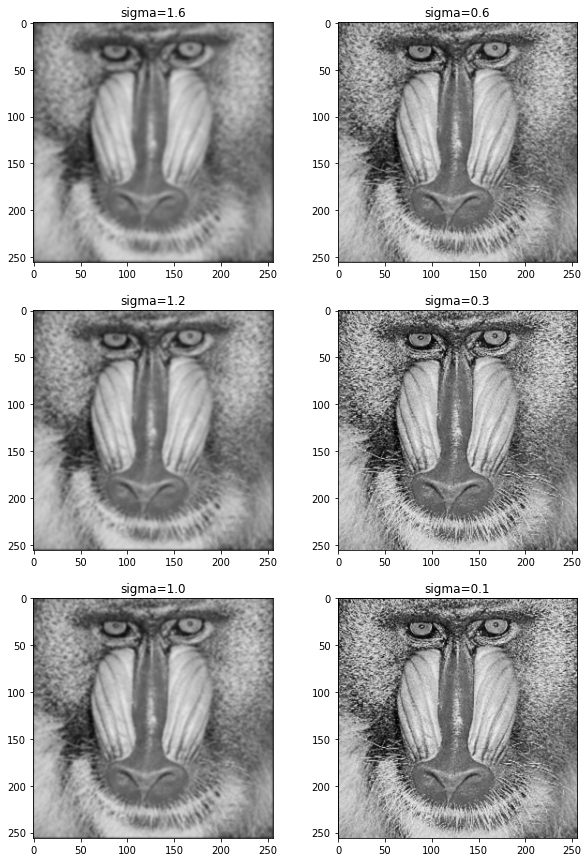

In [ ]:
mandrill = imageio.imread(io.BytesIO(image_bytes), format='PNG')
sigmas = np.array([1.6, 1.2, 1.0, 0.6, 0.3, 0.1])
# Compute the `sizes` of blur kernels using the `sigmas` above.
# <---
sizes = np.ceil(6 * sigmas + 1)
# --->

f, axes = plt.subplots(3, 2, figsize=(10, 15))
for i in range(6):
    # Blur the `mandrill` image using i-th sigma and size values.
    # <---
    blurred = si_blur(mandrill, sigmas[i], sizes[i])
    # --->
    axes[i % 3, i // 3].imshow(blurred, cmap=plt.cm.gray, vmin=0, vmax=255)
    axes[i % 3, i // 3].set_title('sigma=%.1f' % sigmas[i])
plt.show()